# Load and Initiation Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import RandomOverSampler
import collections
from collections import Counter

print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")

Numpy version: 1.22.4
Pandas version: 1.5.3
Seaborn version: 0.12.2


In [ ]:
rcParams['figure.figsize'] = (10, 7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
import warnings
warnings.filterwarnings('ignore') ##hati hati menggunakan ini karena peringatan tidak bisa terdeteksi

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [ ]:
df = pd.read_csv("marketing_campaign.csv",sep=";")
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1856,6710,1951,Master,Single,58217.0,2,1,2012-11-17,84,68,...,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,3,11,0
1106,6271,1952,PhD,Married,50870.0,0,1,2014-06-19,13,53,...,5,0,0,0,0,0,0,3,11,0
787,6299,1968,PhD,Divorced,42564.0,0,1,2013-01-02,28,324,...,7,1,0,0,0,0,0,3,11,1
637,944,1962,Graduation,Married,56181.0,0,1,2013-01-08,6,121,...,4,0,0,0,0,0,0,3,11,0


# Data Preprocessing

## Handling Missing Value

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<i>Terdapat 24 missing value pada kolom **Income**.</i>

In [ ]:
(df.isna().sum()/df.shape[0]*100)['Income']

1.0714285714285714

<i>Data yang hilang adalah sebanyak **1.07%**. Maka dari itu, dikarenakan data yang hilang kurang dari 5% data total, baris dengan data yang hilang akan dihapuskan.</i>

In [ ]:
df.dropna(inplace=True, subset=['Income'])

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Handling Duplicated Data

In [ ]:
df.duplicated().sum()

0

<i>Tidak terdapat data duplikat pada dataset ini.</i>



## Feature Extraction

*   <i>Membuat kolom **Age** dari kolom **Year_Birth**</I>
*   <i>Membuat kolom **Dependents** dari akumulasi kolom **Kidhome** dan **Teenhome**</i> 



In [ ]:
df['Age'] = 2023 - df['Year_Birth']
df['Dependents'] = df['Kidhome'] + df['Teenhome']

In [ ]:
columns = ['Education', 'Marital_Status', 'Income', 'Age', 'Dependents', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'ID', 'Z_CostContact', 'Z_Revenue', 'Complain', 'Year_Birth', 'Kidhome', 'Teenhome']
df = df[columns]

In [ ]:
df.sample()

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
1806,PhD,Single,7144.0,57,2,2013-12-07,92,81,4,33,...,0,0,0,6237,3,11,0,1966,0,2


## Label Encoding

<i>Label Encoding akan dilakukan pada kolom **Education** yang memiliki tipe data ordinal.</i>

In [ ]:
x = np.array(df['Education'])
print(np.unique(x))

['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']


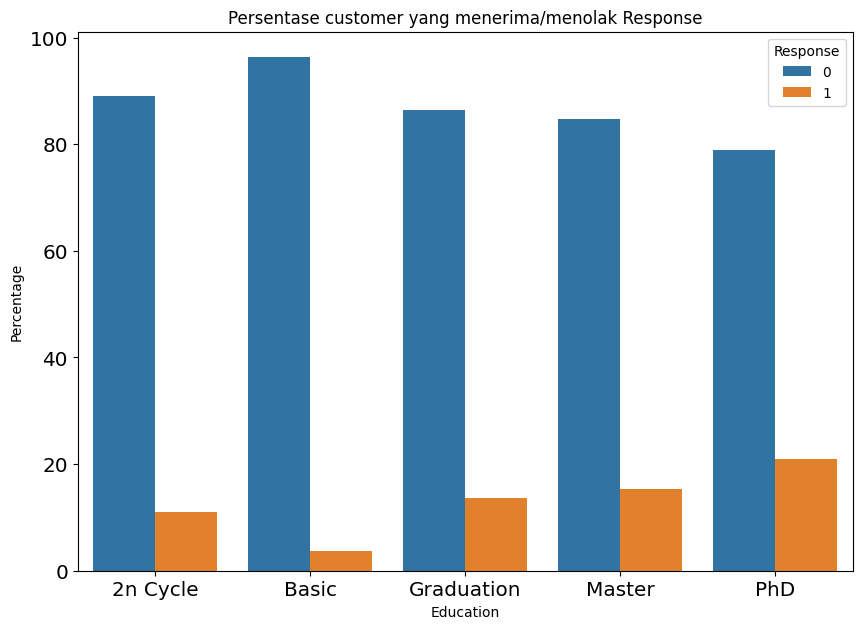

In [ ]:
df_temp = df.groupby(['Education', 'Response'])['ID'].count().reset_index()
df_temp_2 = df.groupby(['Education'])['ID'].count().reset_index()
df_merge = df_temp.merge(df_temp_2, on='Education', how='inner')
df_merge.columns = ['Education', 'Response', 'CountCust', 'TotalCust']
df_merge['Percentage'] = df_merge['CountCust'] / df_merge['TotalCust'] * 100
  
sns.barplot(x = 'Education', y = 'Percentage', data = df_merge, hue = 'Response')
plt.title('Persentase customer yang menerima/menolak Response')
plt.show()

<i>Kategori **"2n Cycle"** memiliki arti yang sama dengan **"Master"**. Persentase customer yang menolak dan menerima respon untuk kategori **'2n Cycle'** dan **'Master'** juga kurang lebih sama. Maka dari itu, baris yang memiliki kategori **"2n Cycle"** akan dihapus dan digantikan dengan kaegori **"Master"**.</i>

In [ ]:
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')
x = np.array(df['Education'])
print(np.unique(x))

['Basic' 'Graduation' 'Master' 'PhD']


In [ ]:
df.sample()

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
642,PhD,Divorced,62859.0,64,1,2012-12-30,37,1063,89,102,...,0,0,0,2131,3,11,0,1959,0,1


<i>Dilakukan perubahan feature categorical menjadi numeric sebagai berikut:

- 'Basic' --> 0
- 'Graduation' --> 1
- 'Master' --> 2
- 'PhD' --> 3
</i>

In [ ]:
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3    
}
df['Education'] = df['Education'].map(mapping_education)

In [ ]:
df.sample()

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
1456,1,Divorced,43300.0,52,1,2012-10-13,87,91,3,52,...,0,0,1,4042,3,11,0,1971,0,1


## One Hot Encoding (OHE)

<i>One Hot Encoding akan dilakukan pada kolom **Marital_Status** yang memiliki lebih dari 2 kategori dan tidak bertipe data ordinal.</i>

In [ ]:
x = np.array(df['Marital_Status'])
print(np.unique(x))

['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


In [ ]:
df.head(5)

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
0,1,Single,58138.0,66,0,2012-09-04,58,635,88,546,...,0,0,1,5524,3,11,0,1957,0,0
1,1,Single,46344.0,69,2,2014-03-08,38,11,1,6,...,0,0,0,2174,3,11,0,1954,1,1
2,1,Together,71613.0,58,0,2013-08-21,26,426,49,127,...,0,0,0,4141,3,11,0,1965,0,0
3,1,Together,26646.0,39,1,2014-02-10,26,11,4,20,...,0,0,0,6182,3,11,0,1984,1,0
4,3,Married,58293.0,42,1,2014-01-19,94,173,43,118,...,0,0,0,5324,3,11,0,1981,1,0


<i>Sebelum dilakukan OHE, banyak kategori dalam kolom **Marital_Status** yang ambigu dan memiliki arti yang sama. Maka dari itu, dilakukan terlebih dahulu pergantian nama kategori.</i>

In [ ]:
# Mengganti kategori 'Absurd' dan 'YOLO' menjadi 'Others'
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'YOLO'],'Others')
# Mengganti kategori 'Alone' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

x = np.array(df['Marital_Status'])
print(np.unique(x))

['Divorced' 'Married' 'Others' 'Single' 'Widow']


In [ ]:
# Melakukan OHE
ohe = pd.get_dummies(df['Marital_Status'], prefix = 'Status')
df = df.join(ohe)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Age                  2216 non-null   int64  
 4   Dependents           2216 non-null   int64  
 5   Dt_Customer          2216 non-null   object 
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

In [ ]:
# Menghapus kolom Marital Status
df = df.drop(columns=['Marital_Status']).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Age                  2216 non-null   int64  
 3   Dependents           2216 non-null   int64  
 4   Dt_Customer          2216 non-null   object 
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [ ]:
df.columns

Index(['Education', 'Income', 'Age', 'Dependents', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'ID', 'Z_CostContact',
       'Z_Revenue', 'Complain', 'Year_Birth', 'Kidhome', 'Teenhome',
       'Status_Divorced', 'Status_Married', 'Status_Others', 'Status_Single',
       'Status_Widow'],
      dtype='object')

In [ ]:
columns2 = ['Age', 'Education', 'Status_Divorced', 'Status_Married', 
               'Status_Others', 'Status_Single', 'Status_Widow', 'Income','Dependents', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
               'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
            'ID', 'Year_Birth', 'Kidhome', 'Teenhome']
df = df[columns2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Status_Divorced      2216 non-null   uint8  
 3   Status_Married       2216 non-null   uint8  
 4   Status_Others        2216 non-null   uint8  
 5   Status_Single        2216 non-null   uint8  
 6   Status_Widow         2216 non-null   uint8  
 7   Income               2216 non-null   float64
 8   Dependents           2216 non-null   int64  
 9   Dt_Customer          2216 non-null   object 
 10  Recency              2216 non-null   int64  
 11  MntWines             2216 non-null   int64  
 12  MntFruits            2216 non-null   int64  
 13  MntMeatProducts      2216 non-null   int64  
 14  MntFishProducts      2216 non-null   int64  
 15  MntSweetProducts     2216 non-null   i

# Analysis After Data Preprocessing

In [ ]:
nums=['Income', 'Dependents','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cats =['Education','Status_Divorced','Status_Married', 'Status_Others', 'Status_Single', 'Status_Widow', 
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

## Univariate

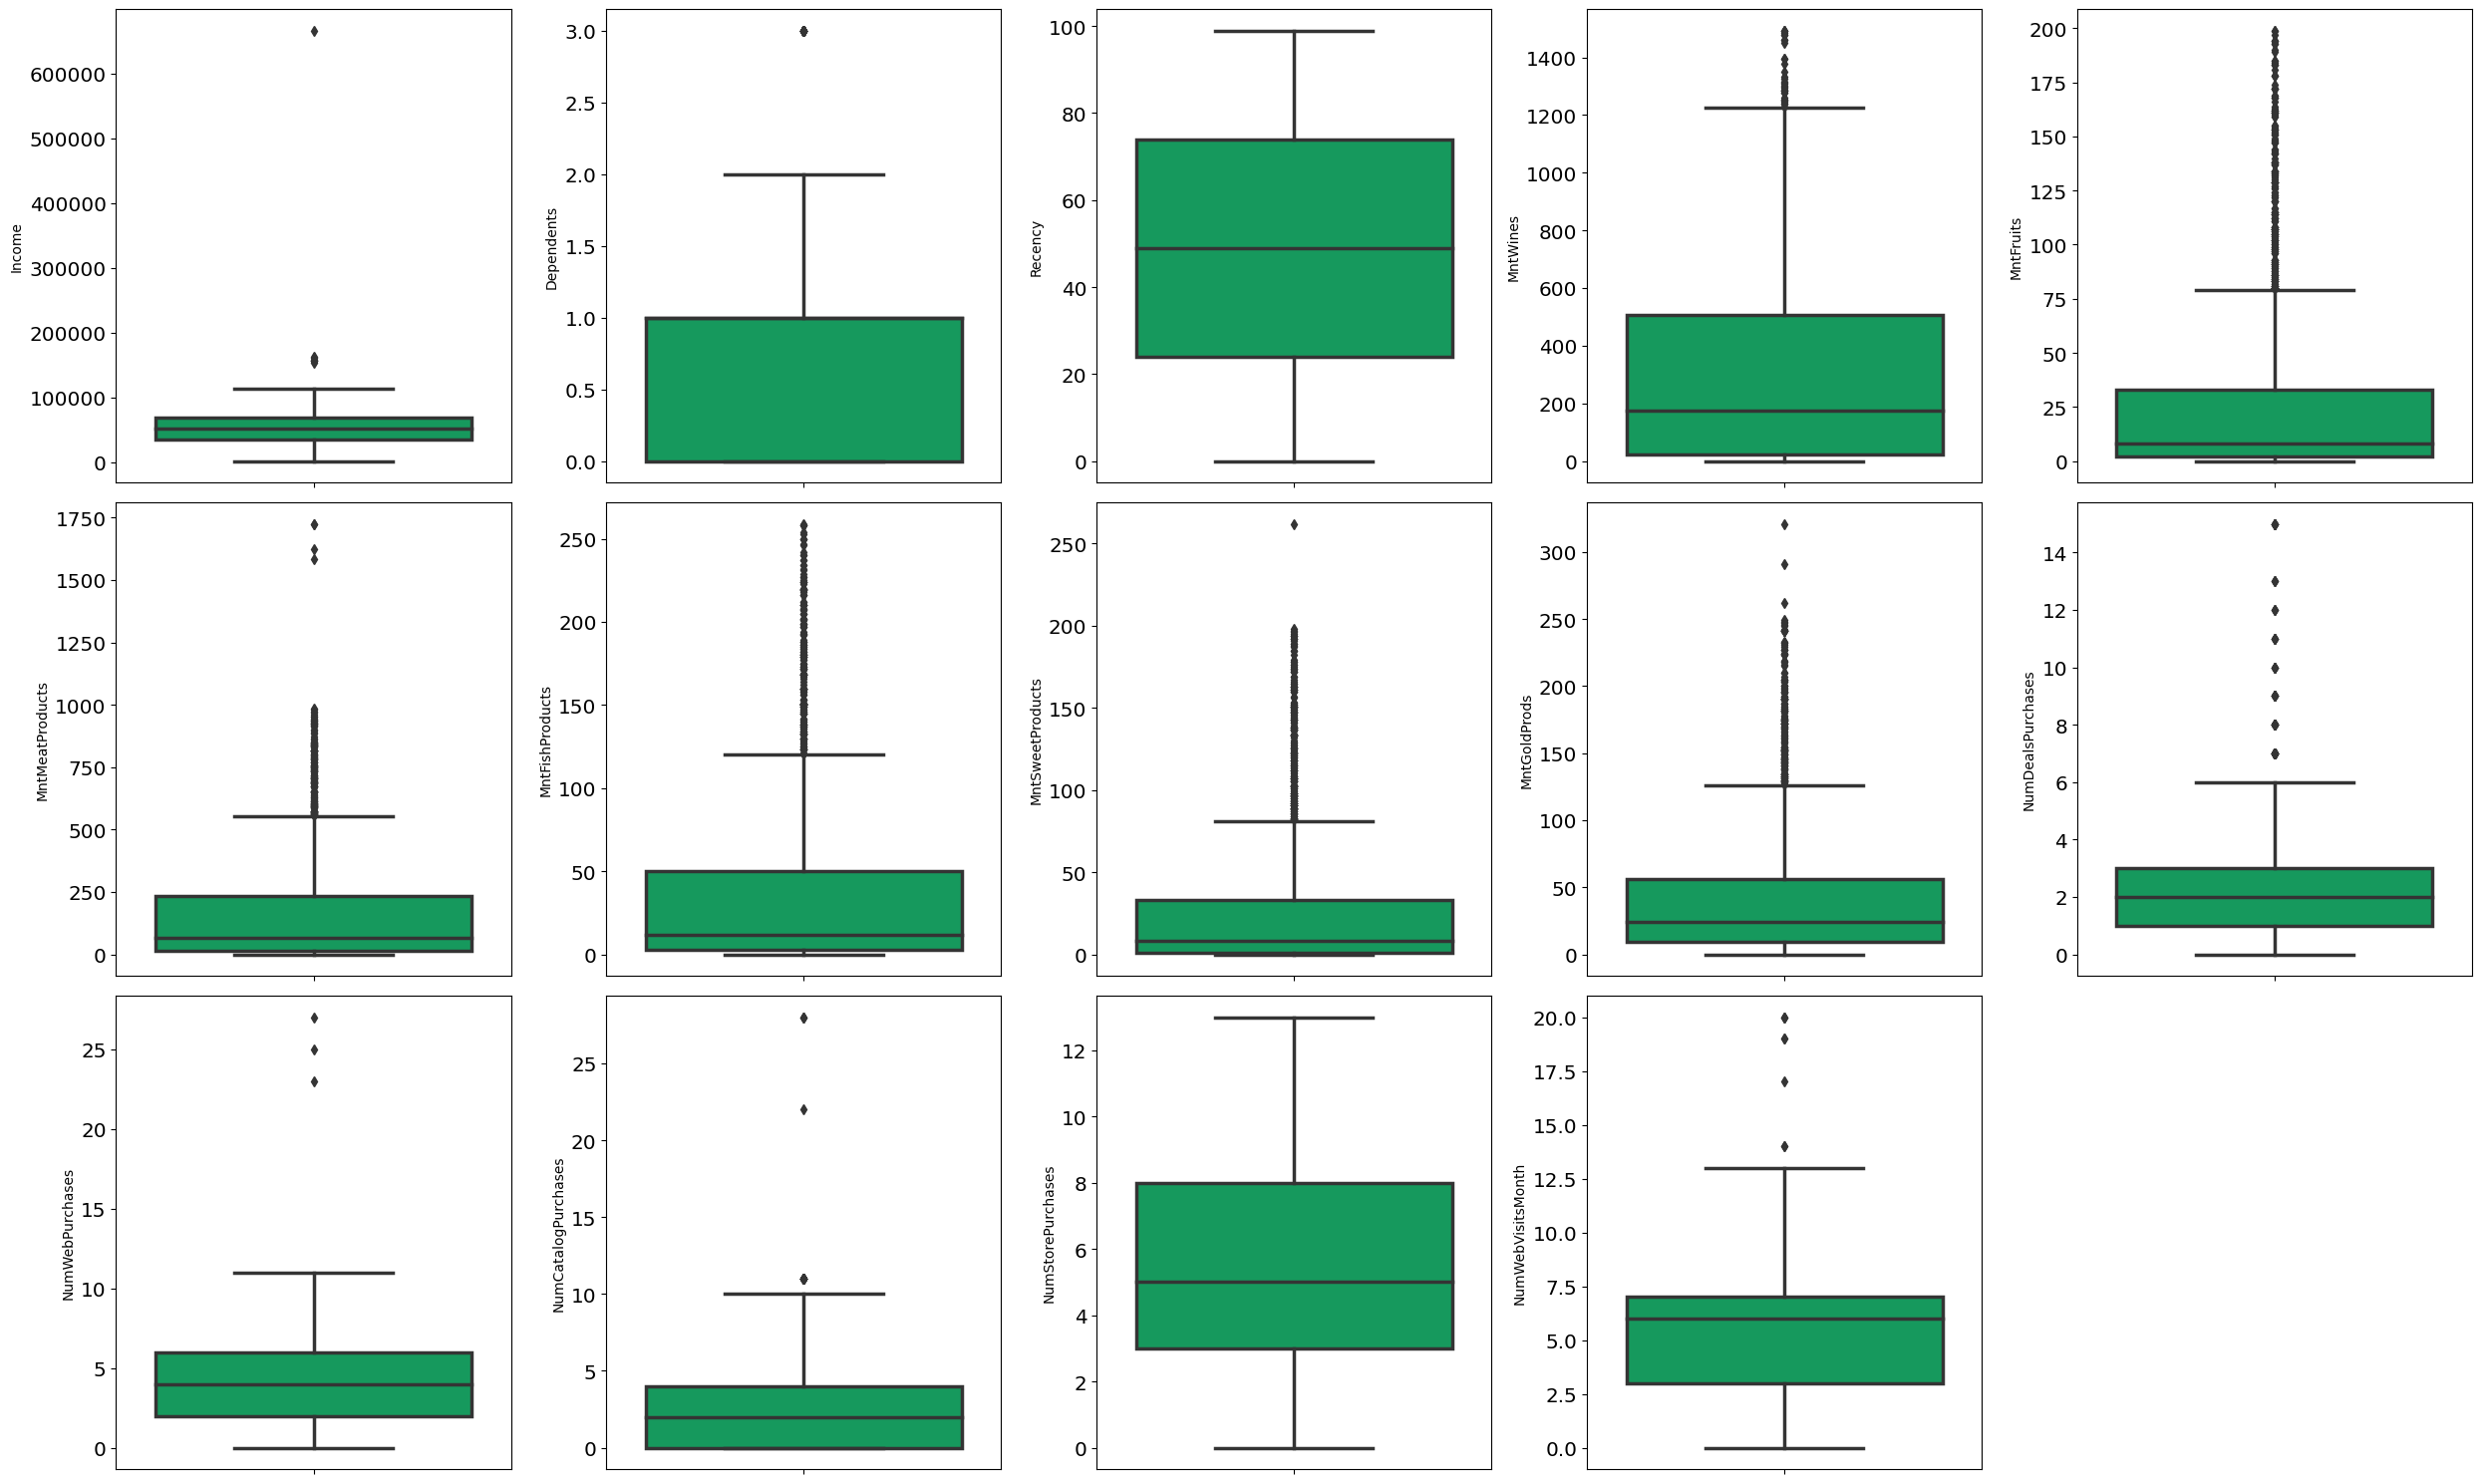

In [ ]:
# Individual Boxplot
plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='#00af5f', orient='v')
    plt.tight_layout()

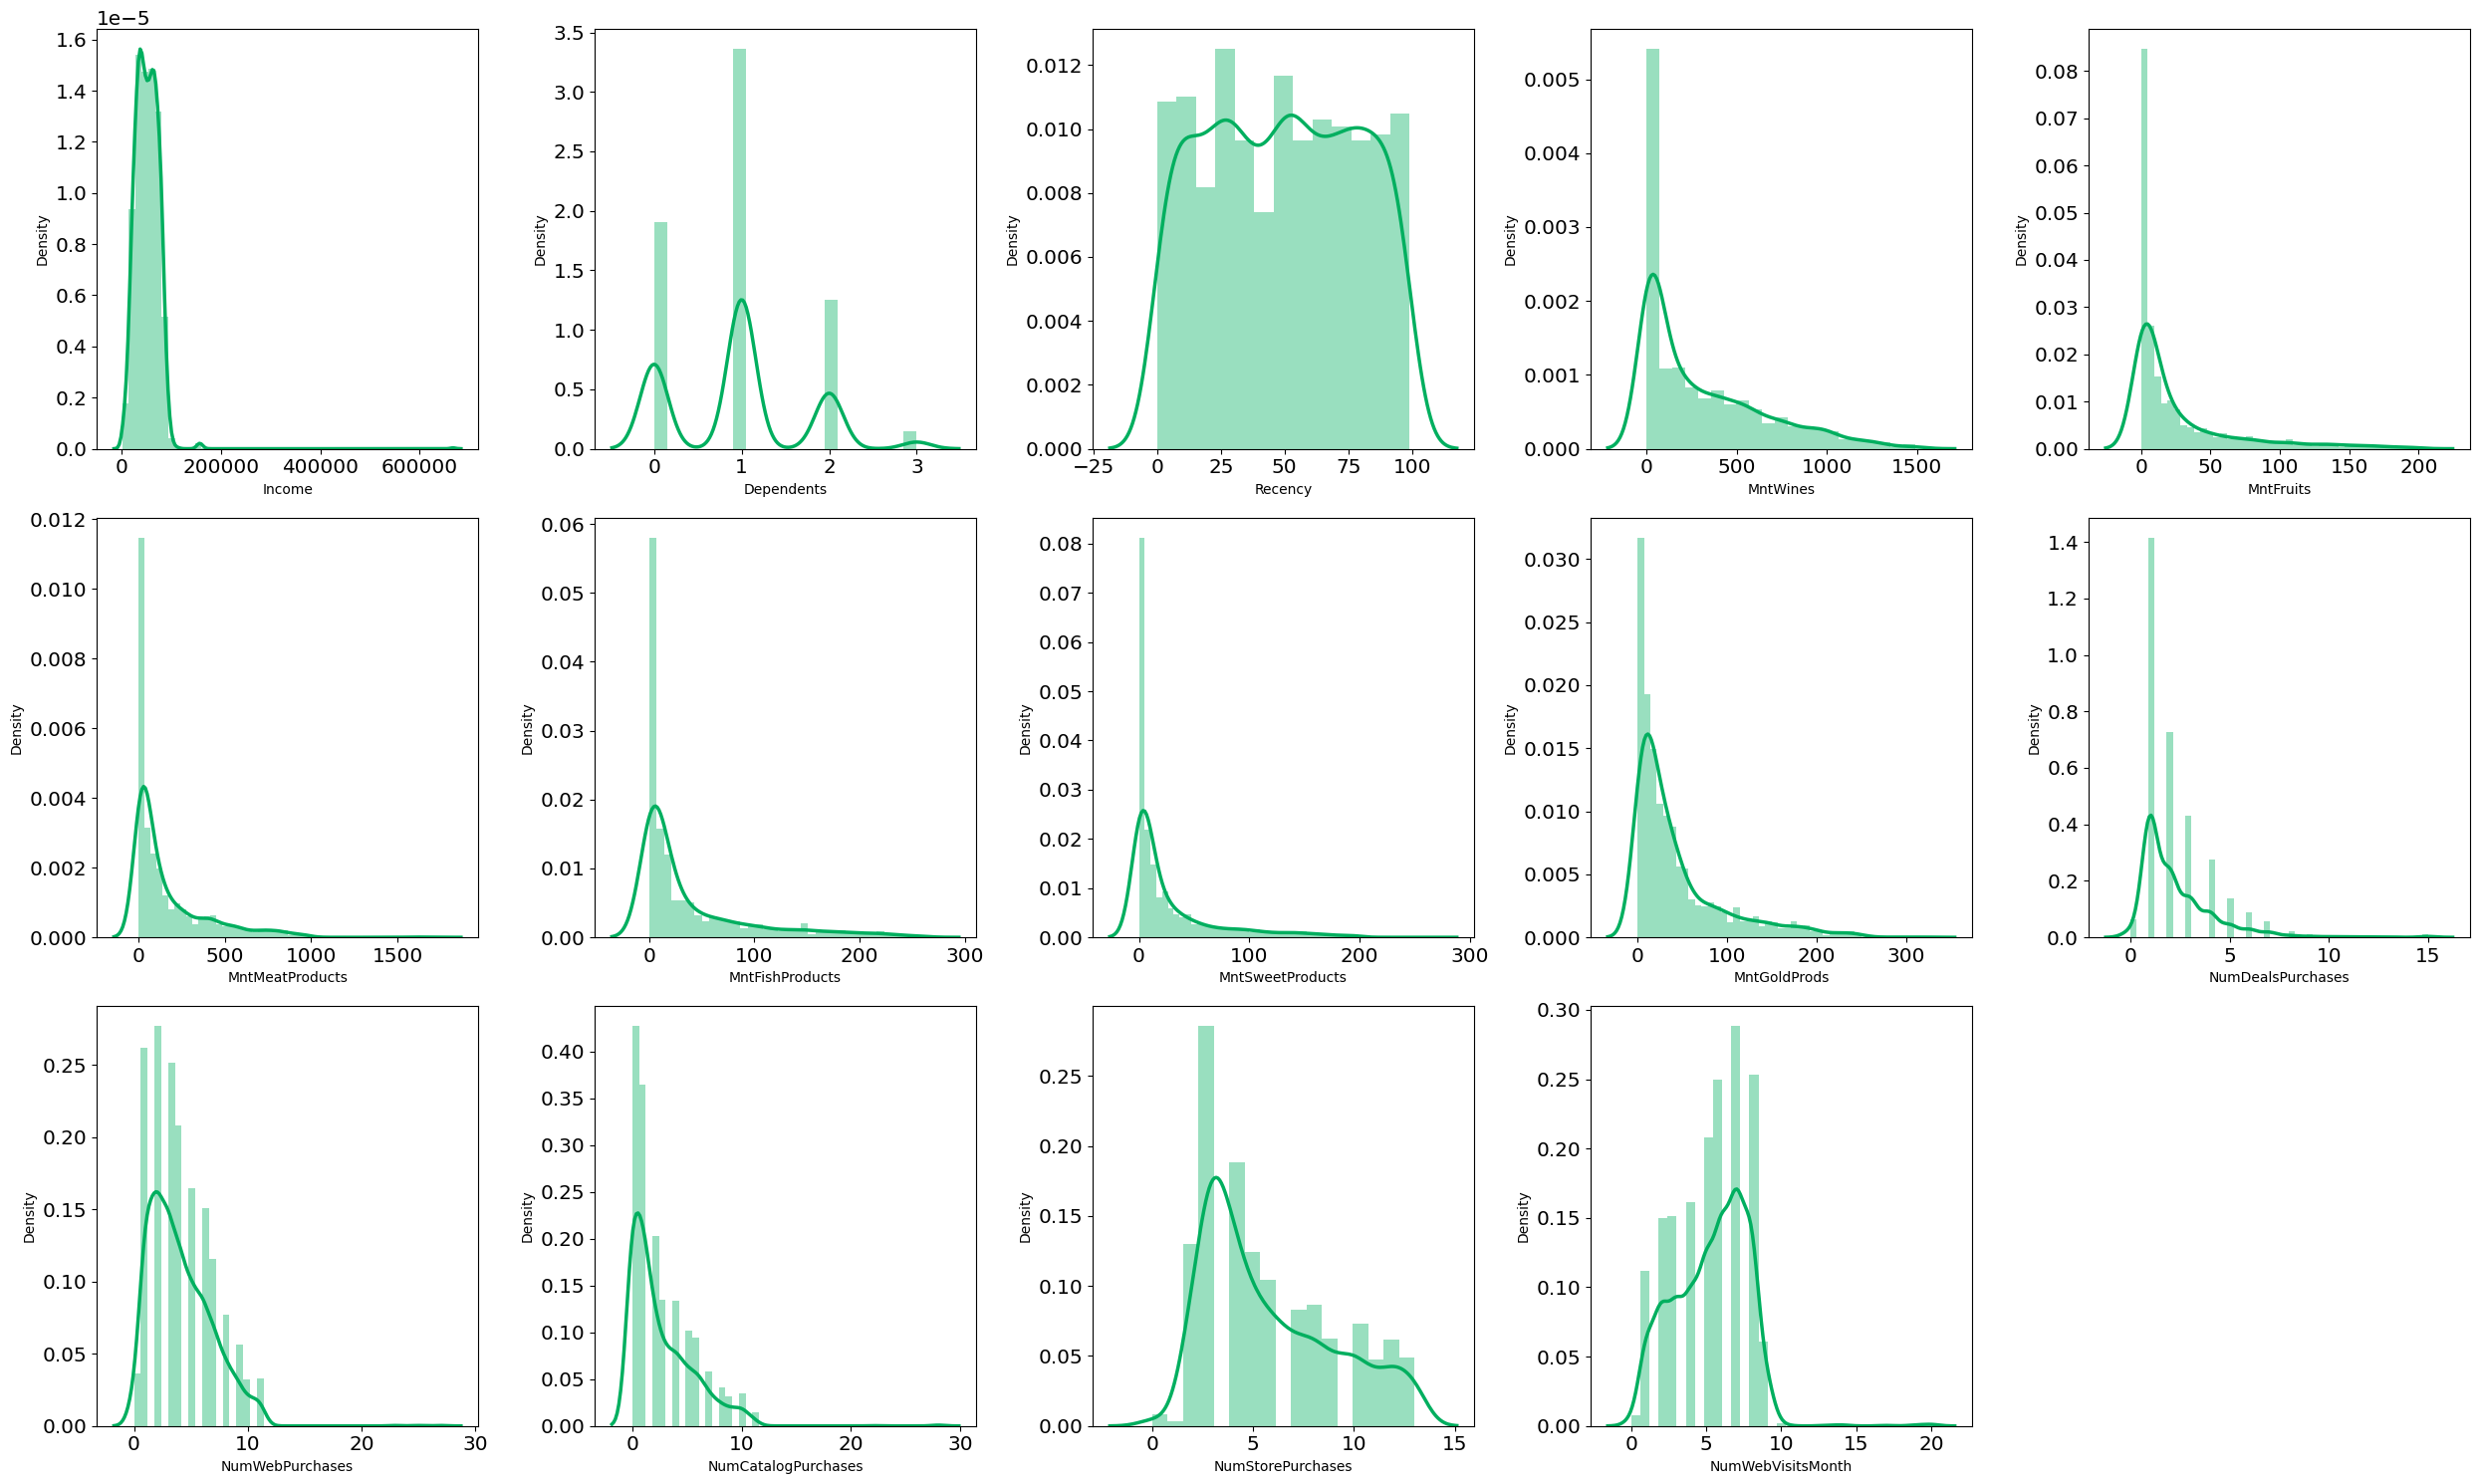

In [ ]:
# Individual Distplot
plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1) 
    sns.distplot(df[nums[i]], color='#00af5f')
    plt.tight_layout()

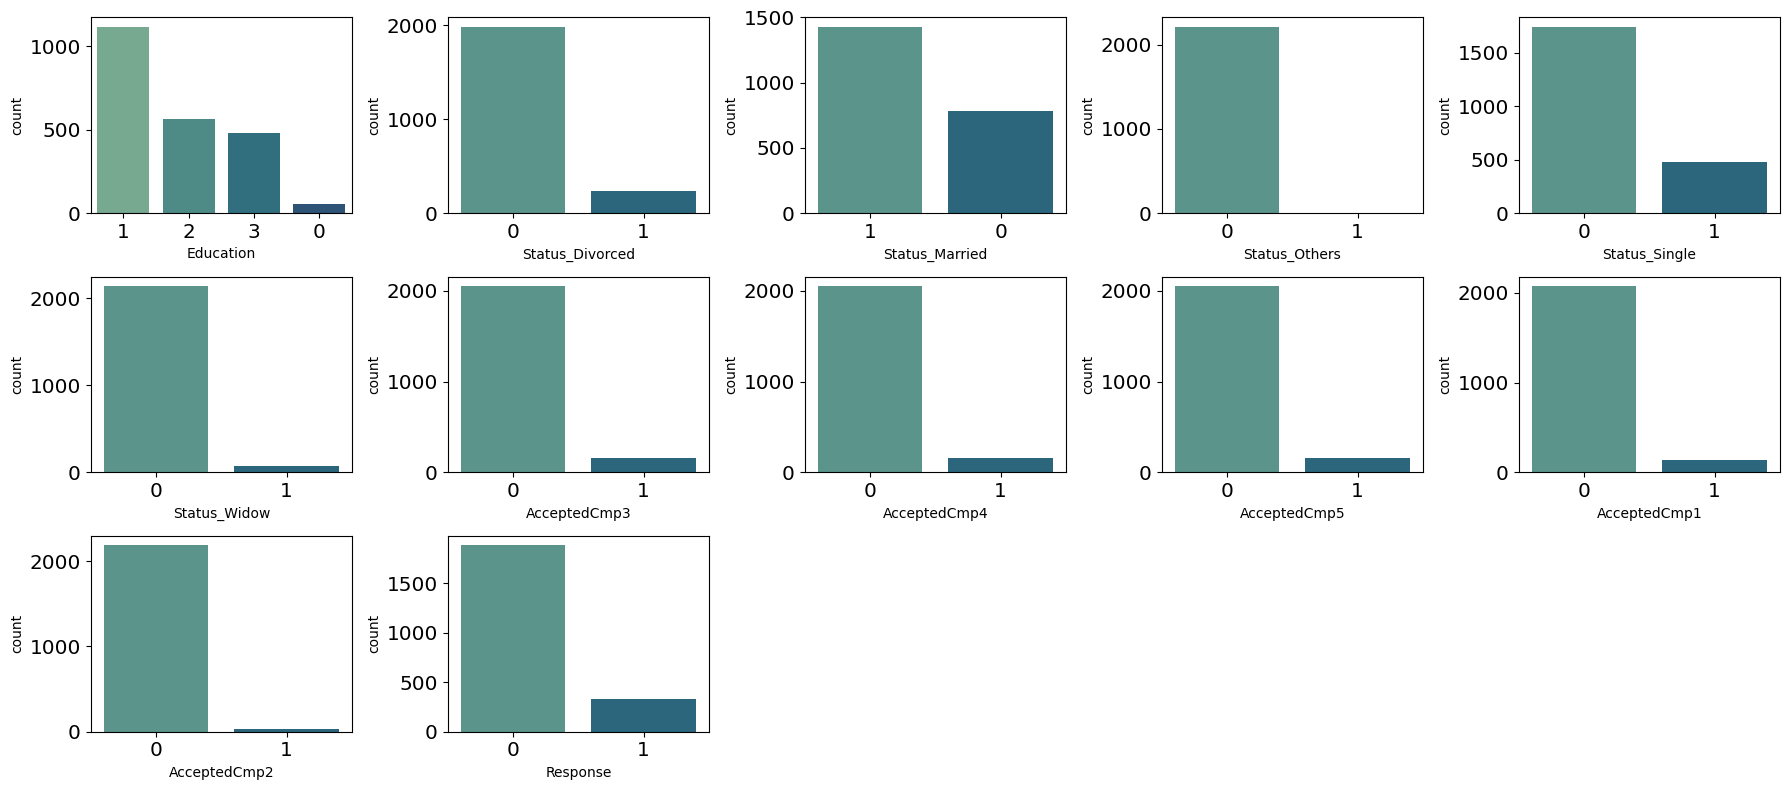

In [ ]:
# Individual Countplot
plt.figure(figsize=(18, 8))
for i in range(0, len(cats)):
    plt.subplot(3, 5, i+1)
    sns.countplot(data=df, x=df[cats[i]], palette='crest', orient='h', order=df[cats[i]].value_counts().index)
    plt.tight_layout()

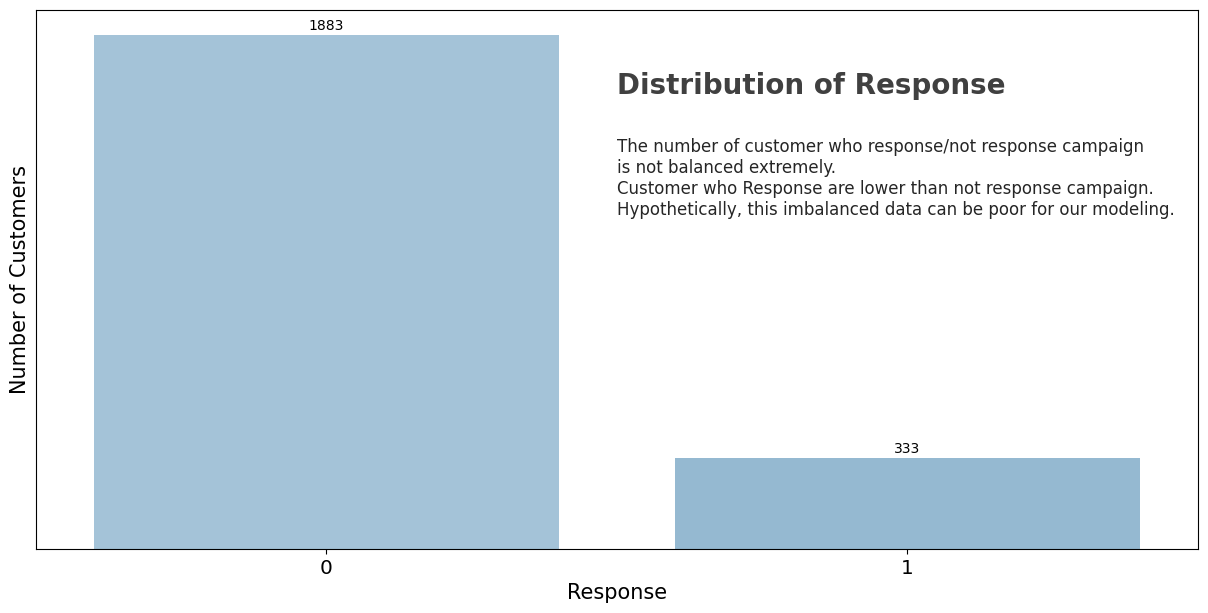

In [ ]:
# Response
fig, ax = plt.subplots(figsize = (15,7))

g = sns.countplot(data=df,
             x='Response',
             palette = sns.color_palette('Blues_d', n_colors = 13, desat = 1))

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 20,
           s = '{:.0f}'.format(height),
           ha = 'center'
          )

title = """
Distribution of Response
"""

text = """
The number of customer who response/not response campaign 
is not balanced extremely.
Customer who Response are lower than not response campaign.
Hypothetically, this imbalanced data can be poor for our modeling.
"""

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Response', fontsize = 15) # Add the x-label
plt.ylabel('Number of Customers', fontsize = 15) # Add the y-label

plt.text(x = 0.5, y = 1550, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 0.5, y = 1150, s=text,
        fontsize = 12, alpha = .85);

plt.savefig('Distributin of Response.png')

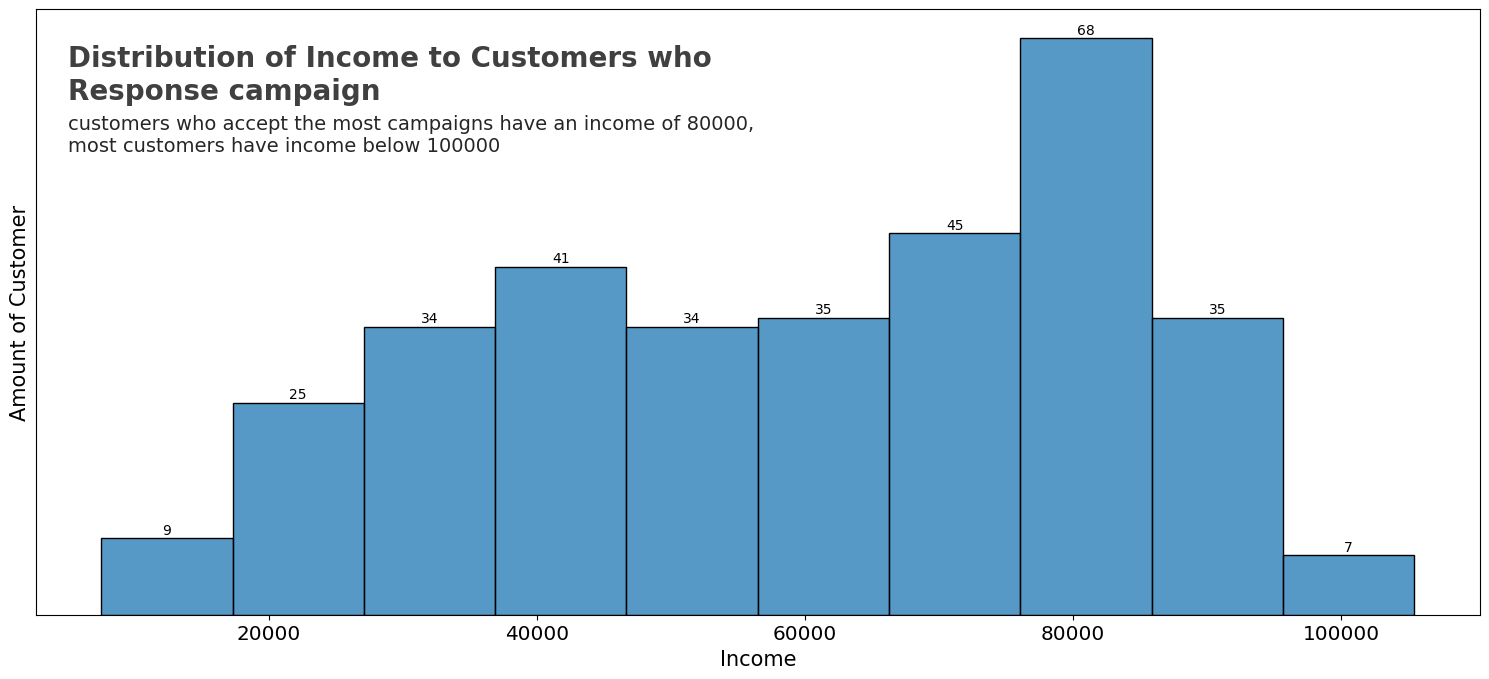

In [ ]:
# Income vs. Response

df_yes = df[df['Response'] == 1]

fig, ax = plt.subplots(figsize=(15,7))

g = sns.histplot(data=df_yes, x='Income',
                palette=sns.color_palette("Blues_d", n_colors=13, desat=1)
               )

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.5,
           s = str('{:.0f}'.format(height)),
           ha = 'center'
          )

title = '''
Distribution of Income to Customers who 
Response campaign
'''

text = '''
customers who accept the most campaigns have an income of 80000, 
most customers have income below 100000
'''

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Income', fontsize = 15) # Add the x-label
plt.ylabel('Amount of Customer', fontsize = 15) # Add the y-label

plt.text(x = 5000, y = 57, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 5000, y = 52, s=text,
        fontsize = 14, alpha = .85);
plt.tight_layout()

plt.savefig('Distribution of Income to Response.png')

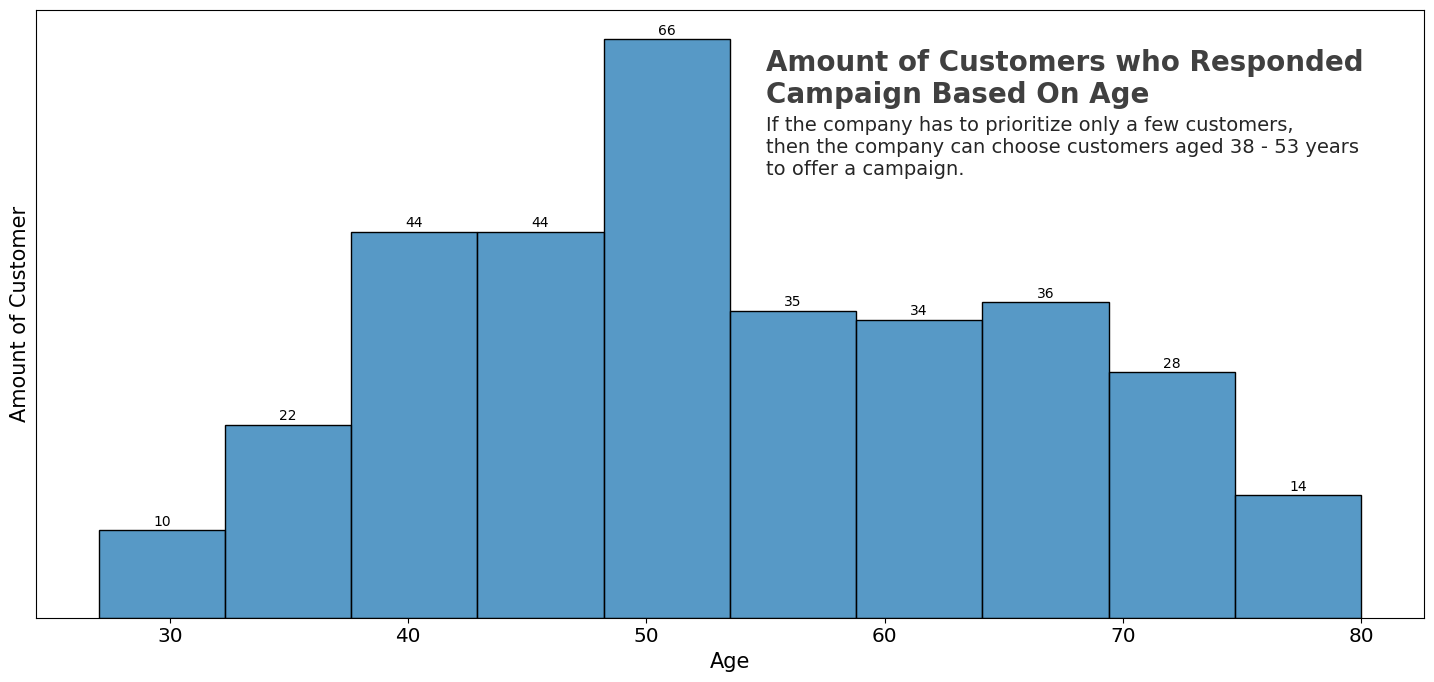

In [ ]:
# Age vs. Response

df_yes = df[df['Response'] == 1]

fig, ax = plt.subplots(figsize=(15,7))

g = sns.histplot(data=df_yes, x='Age',
                palette=sns.color_palette("Blues_d", n_colors=13, desat=1)
               )

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.5,
           s = str('{:.0f}'.format(height)),
           ha = 'center'
          )

title = '''
Amount of Customers who Responded 
Campaign Based On Age
'''

text = '''
If the company has to prioritize only a few customers, 
then the company can choose customers aged 38 - 53 years 
to offer a campaign.
'''

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Age', fontsize = 15) # Add the x-label
plt.ylabel('Amount of Customer', fontsize = 15) # Add the y-label

plt.text(x = 55, y = 55, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 55, y = 48, s=text,
        fontsize = 14, alpha = .85);
plt.tight_layout()

plt.savefig('Amount of Customers who Responded Campaign Based On Age.png')

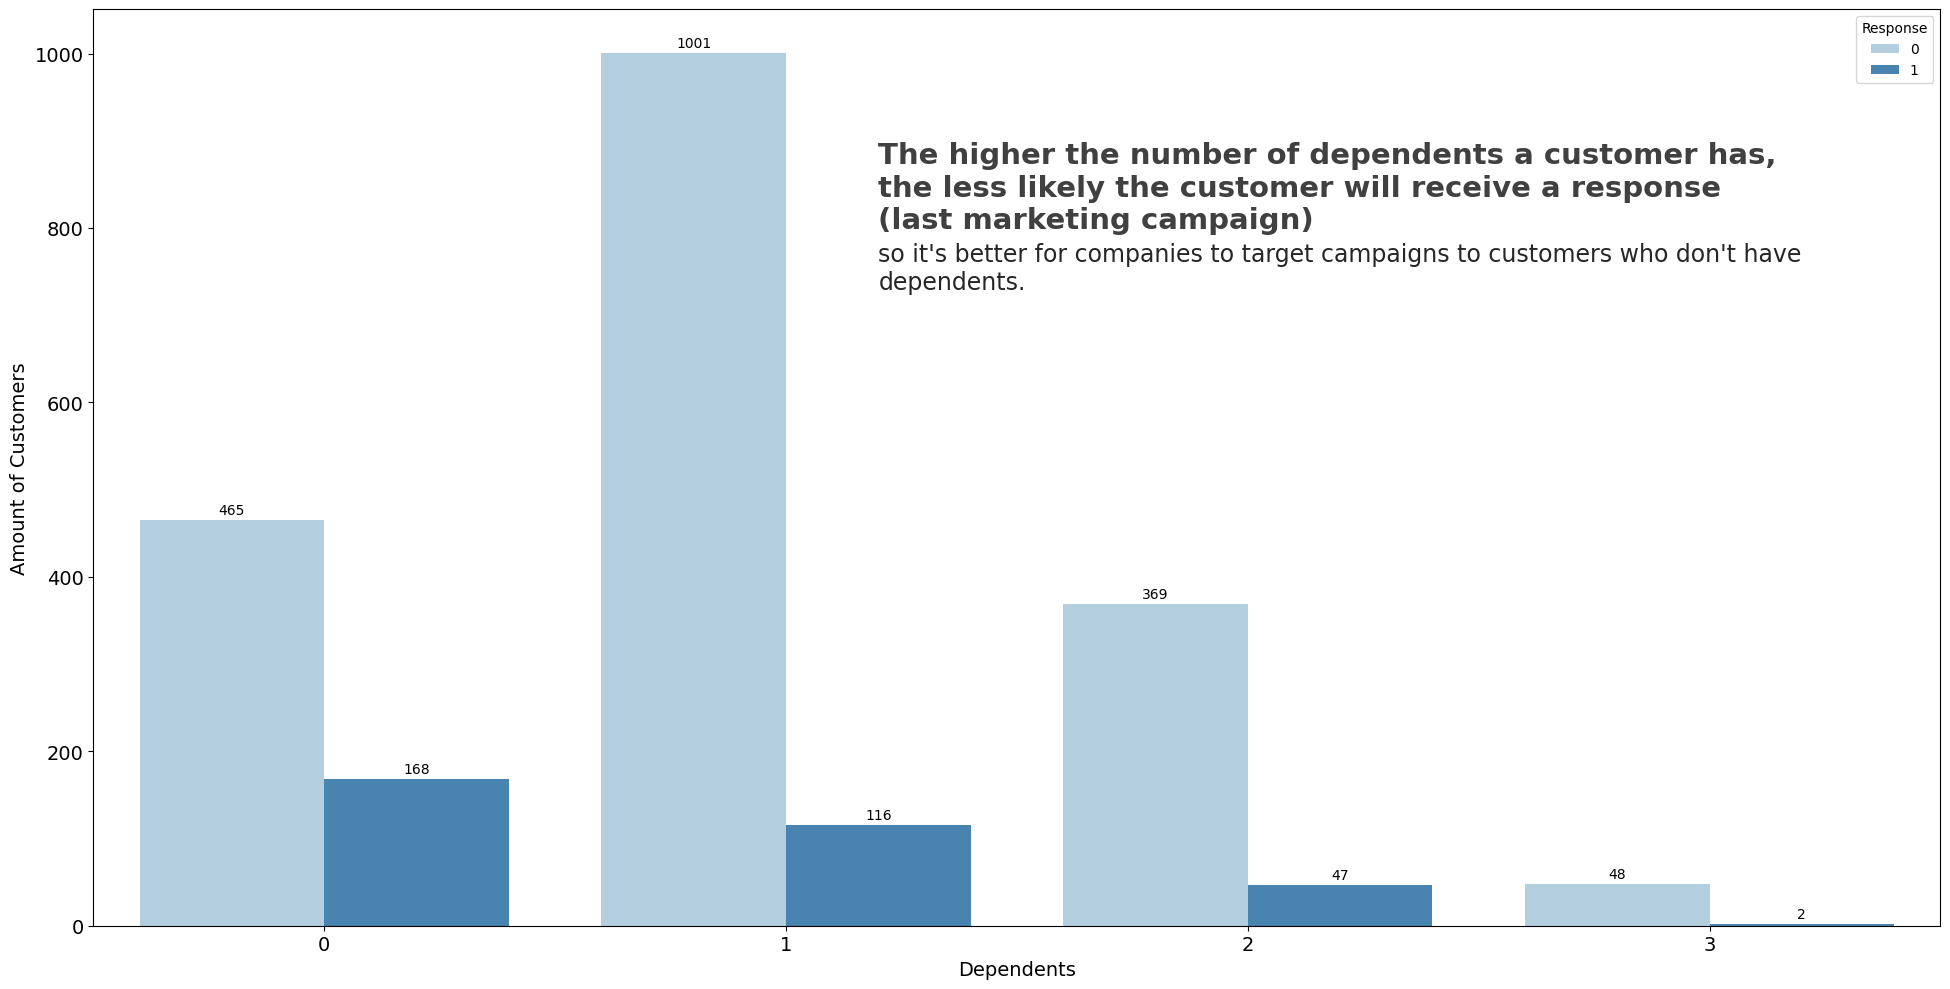

In [ ]:
# Dependents Vs Response
fig, ax = plt.subplots(figsize=(20, 10))

sns.countplot(data=df, x='Dependents', hue='Response', edgecolor='none', palette='Blues')
ax.bar_label(ax.containers[0], padding=2)
ax.bar_label(ax.containers[1], padding=2)

# ax.set_ylim(0,100)
ax.set_xlabel('Dependents', fontsize=14)
ax.set_ylabel('Amount of Customers', fontsize=14)
ax.text(x=1.2, y=800, s='The higher the number of dependents a customer has, \nthe less likely the customer will receive a response \n(last marketing campaign)',
        fontsize=21, weight='bold', alpha=.75)
ax.text(x=1.2, y=730, s="""so it's better for companies to target campaigns to customers who don't have \ndependents.""", 
        fontsize=17, alpha=.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.tight_layout()
plt.savefig('Amount of Dependents.png', dpi=200);

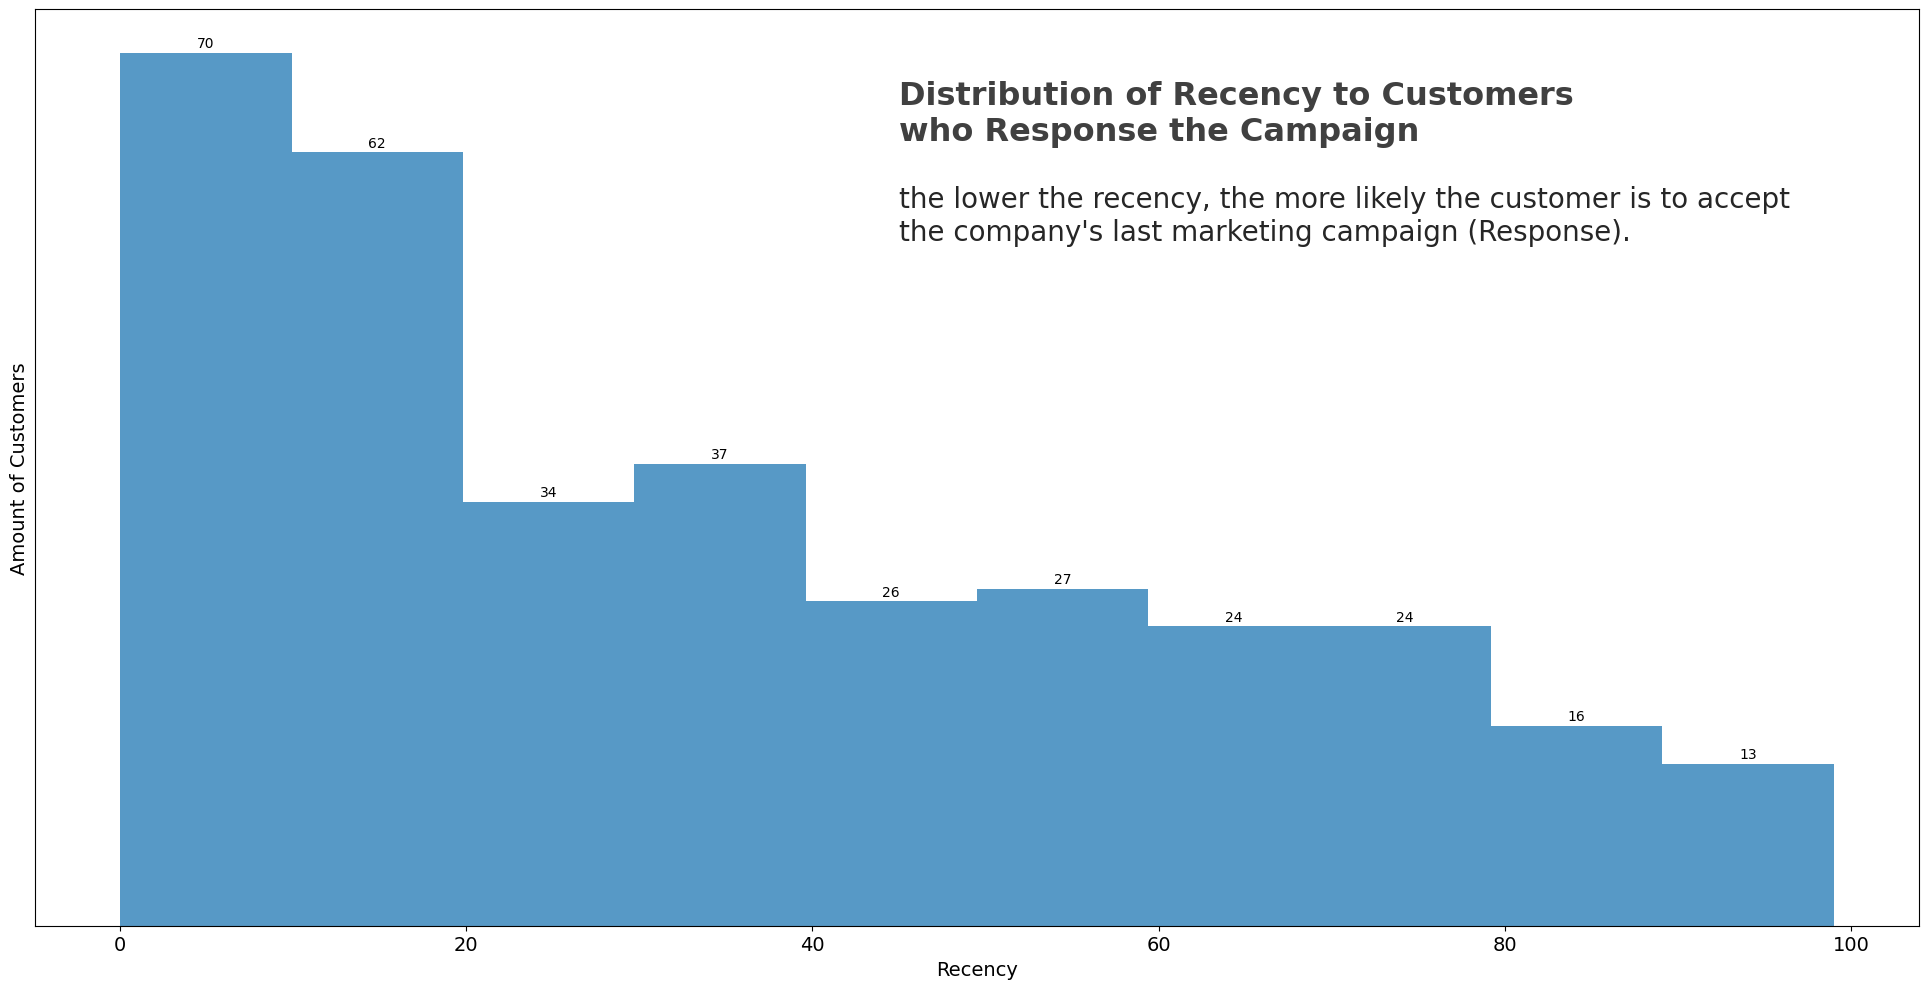

In [ ]:
# Recency Vs Response
df_resp_yes = df[df['Response'] == 1]
fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(data=df_resp_yes, x='Recency', edgecolor='none', palette='Blues')
ax.bar_label(ax.containers[0], padding=2)
ax.bar_label(ax.containers[1], padding=2)

# ax.set_ylim(0,100)
ax.set_yticks([])
ax.set_xlabel('Recency', fontsize=14)
ax.set_ylabel('Amount of Customers', fontsize=14)
ax.text(x=45, y=63, s='Distribution of Recency to Customers \nwho Response the Campaign',
        fontsize=23, weight='bold', alpha=.75)
ax.text(x=45, y=55, s="""the lower the recency, the more likely the customer is to accept \nthe company's last marketing campaign (Response).""", 
        fontsize=20, alpha=.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.tight_layout()
plt.savefig('Distribution of Recency to Response.png', dpi=200);

## Multivariate

<Axes: >

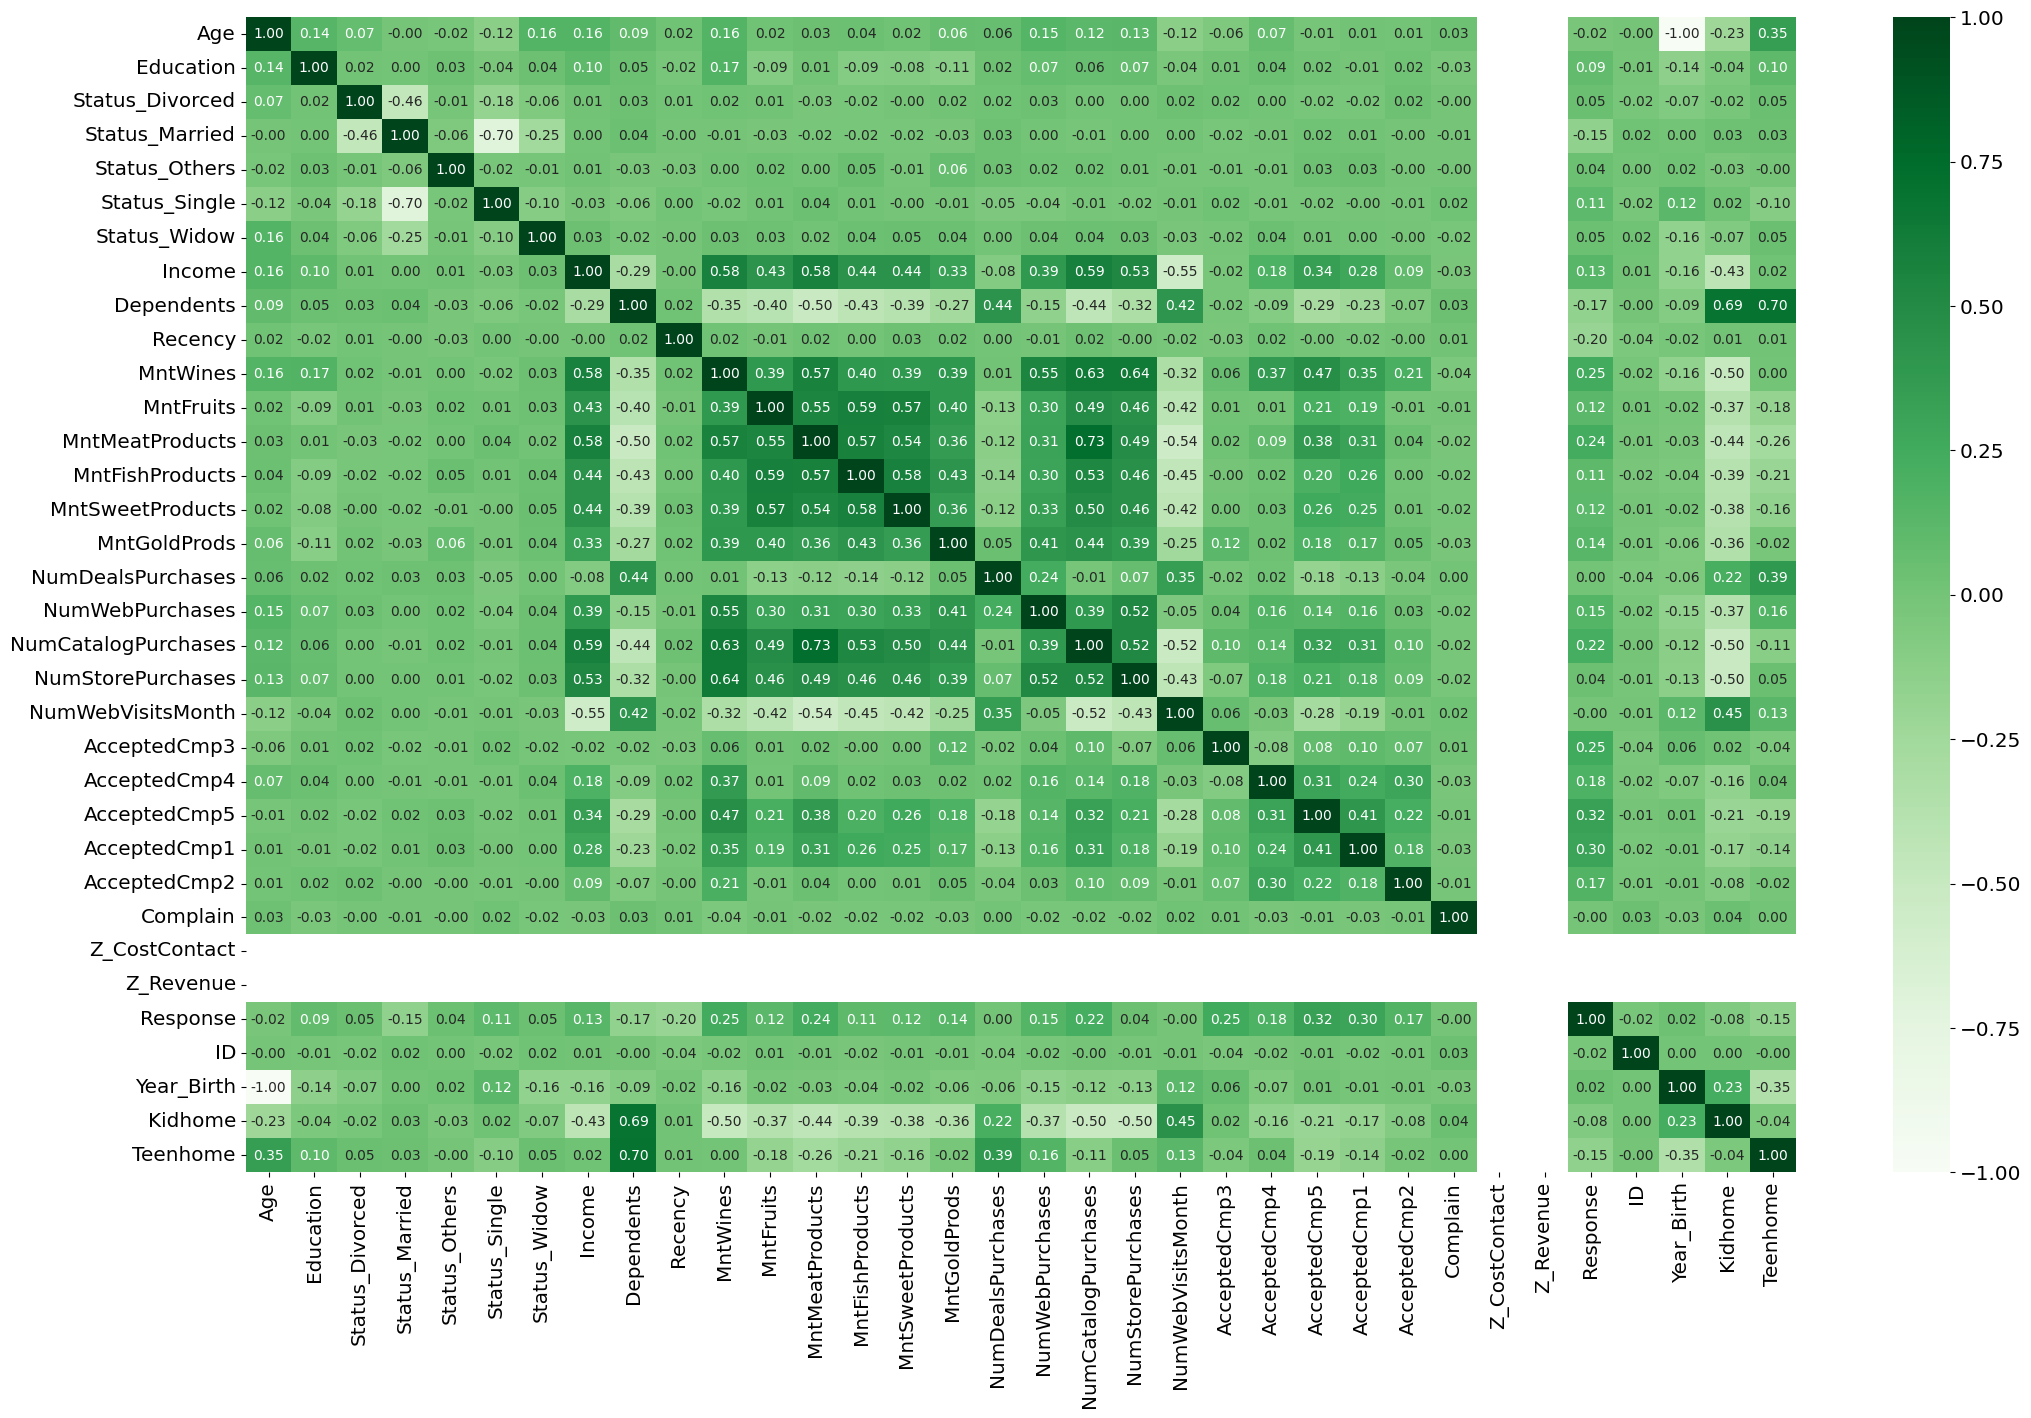

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')

*   <i>Customer dengan **income** tinggi lebih banyak membeli produk, terutama produk **wine** dan **meat**. Mereka juga lebih sering melakukan pembelian melalui **catalog** atau langsung ke **store**</i>
*   <i>Customer yang memiliki **dependents** cenderung jarang membeli produk. Mereka juga lebih sering melakukan pembelian ketika sedang diskon dan cenderung sering mengunjungi website.</i>





# Feature Selection

In [ ]:
# membuang feature yang kurang relevan

drop_feature = ['ID', 'Z_CostContact', 'Z_Revenue', 'Complain', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer']
df = df.drop(columns=drop_feature)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Status_Divorced      2216 non-null   uint8  
 3   Status_Married       2216 non-null   uint8  
 4   Status_Others        2216 non-null   uint8  
 5   Status_Single        2216 non-null   uint8  
 6   Status_Widow         2216 non-null   uint8  
 7   Income               2216 non-null   float64
 8   Dependents           2216 non-null   int64  
 9   Recency              2216 non-null   int64  
 10  MntWines             2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

<i>
Alasan drop feature:

- **ID**: ID bersifat unik di setiap row dengan korelasi sebesar -0.02 dengan Response sehingga tidak akan mempengaruhi target
- **Z_CostContract**: bernilai 3 di setiap row sehingga tidak memberikan informasi yang signifikan terhadap model prediksi
- **Z_Revenue**: bernilai 11 di setiap row sehingga tidak memberikan informasi yang signifikan terhadap model prediksi
- **Complain**: memiliki nilai korelasi senilai -0.00 dengan Response dan hanya sedikikt dari customer yang pernah melakukan complain, sehingga tidak signifikan terhadap target
- **Year_Birth**: dihapus dan dibuat feature baru 'Age' karena lebih menggambarkan umur customer
- **Kidhome** dan **Teenhome**: dihapus dan dibuat feature baru 'Dependents' untuk lebih menggambarkan berapa jumlah anggota keluarga yg dependent
- **Dt_Customer**: dihapus karena tanggal customer mulai bergabung tidak mempengaruhi model prediksi
</i>

## Handling Outliers

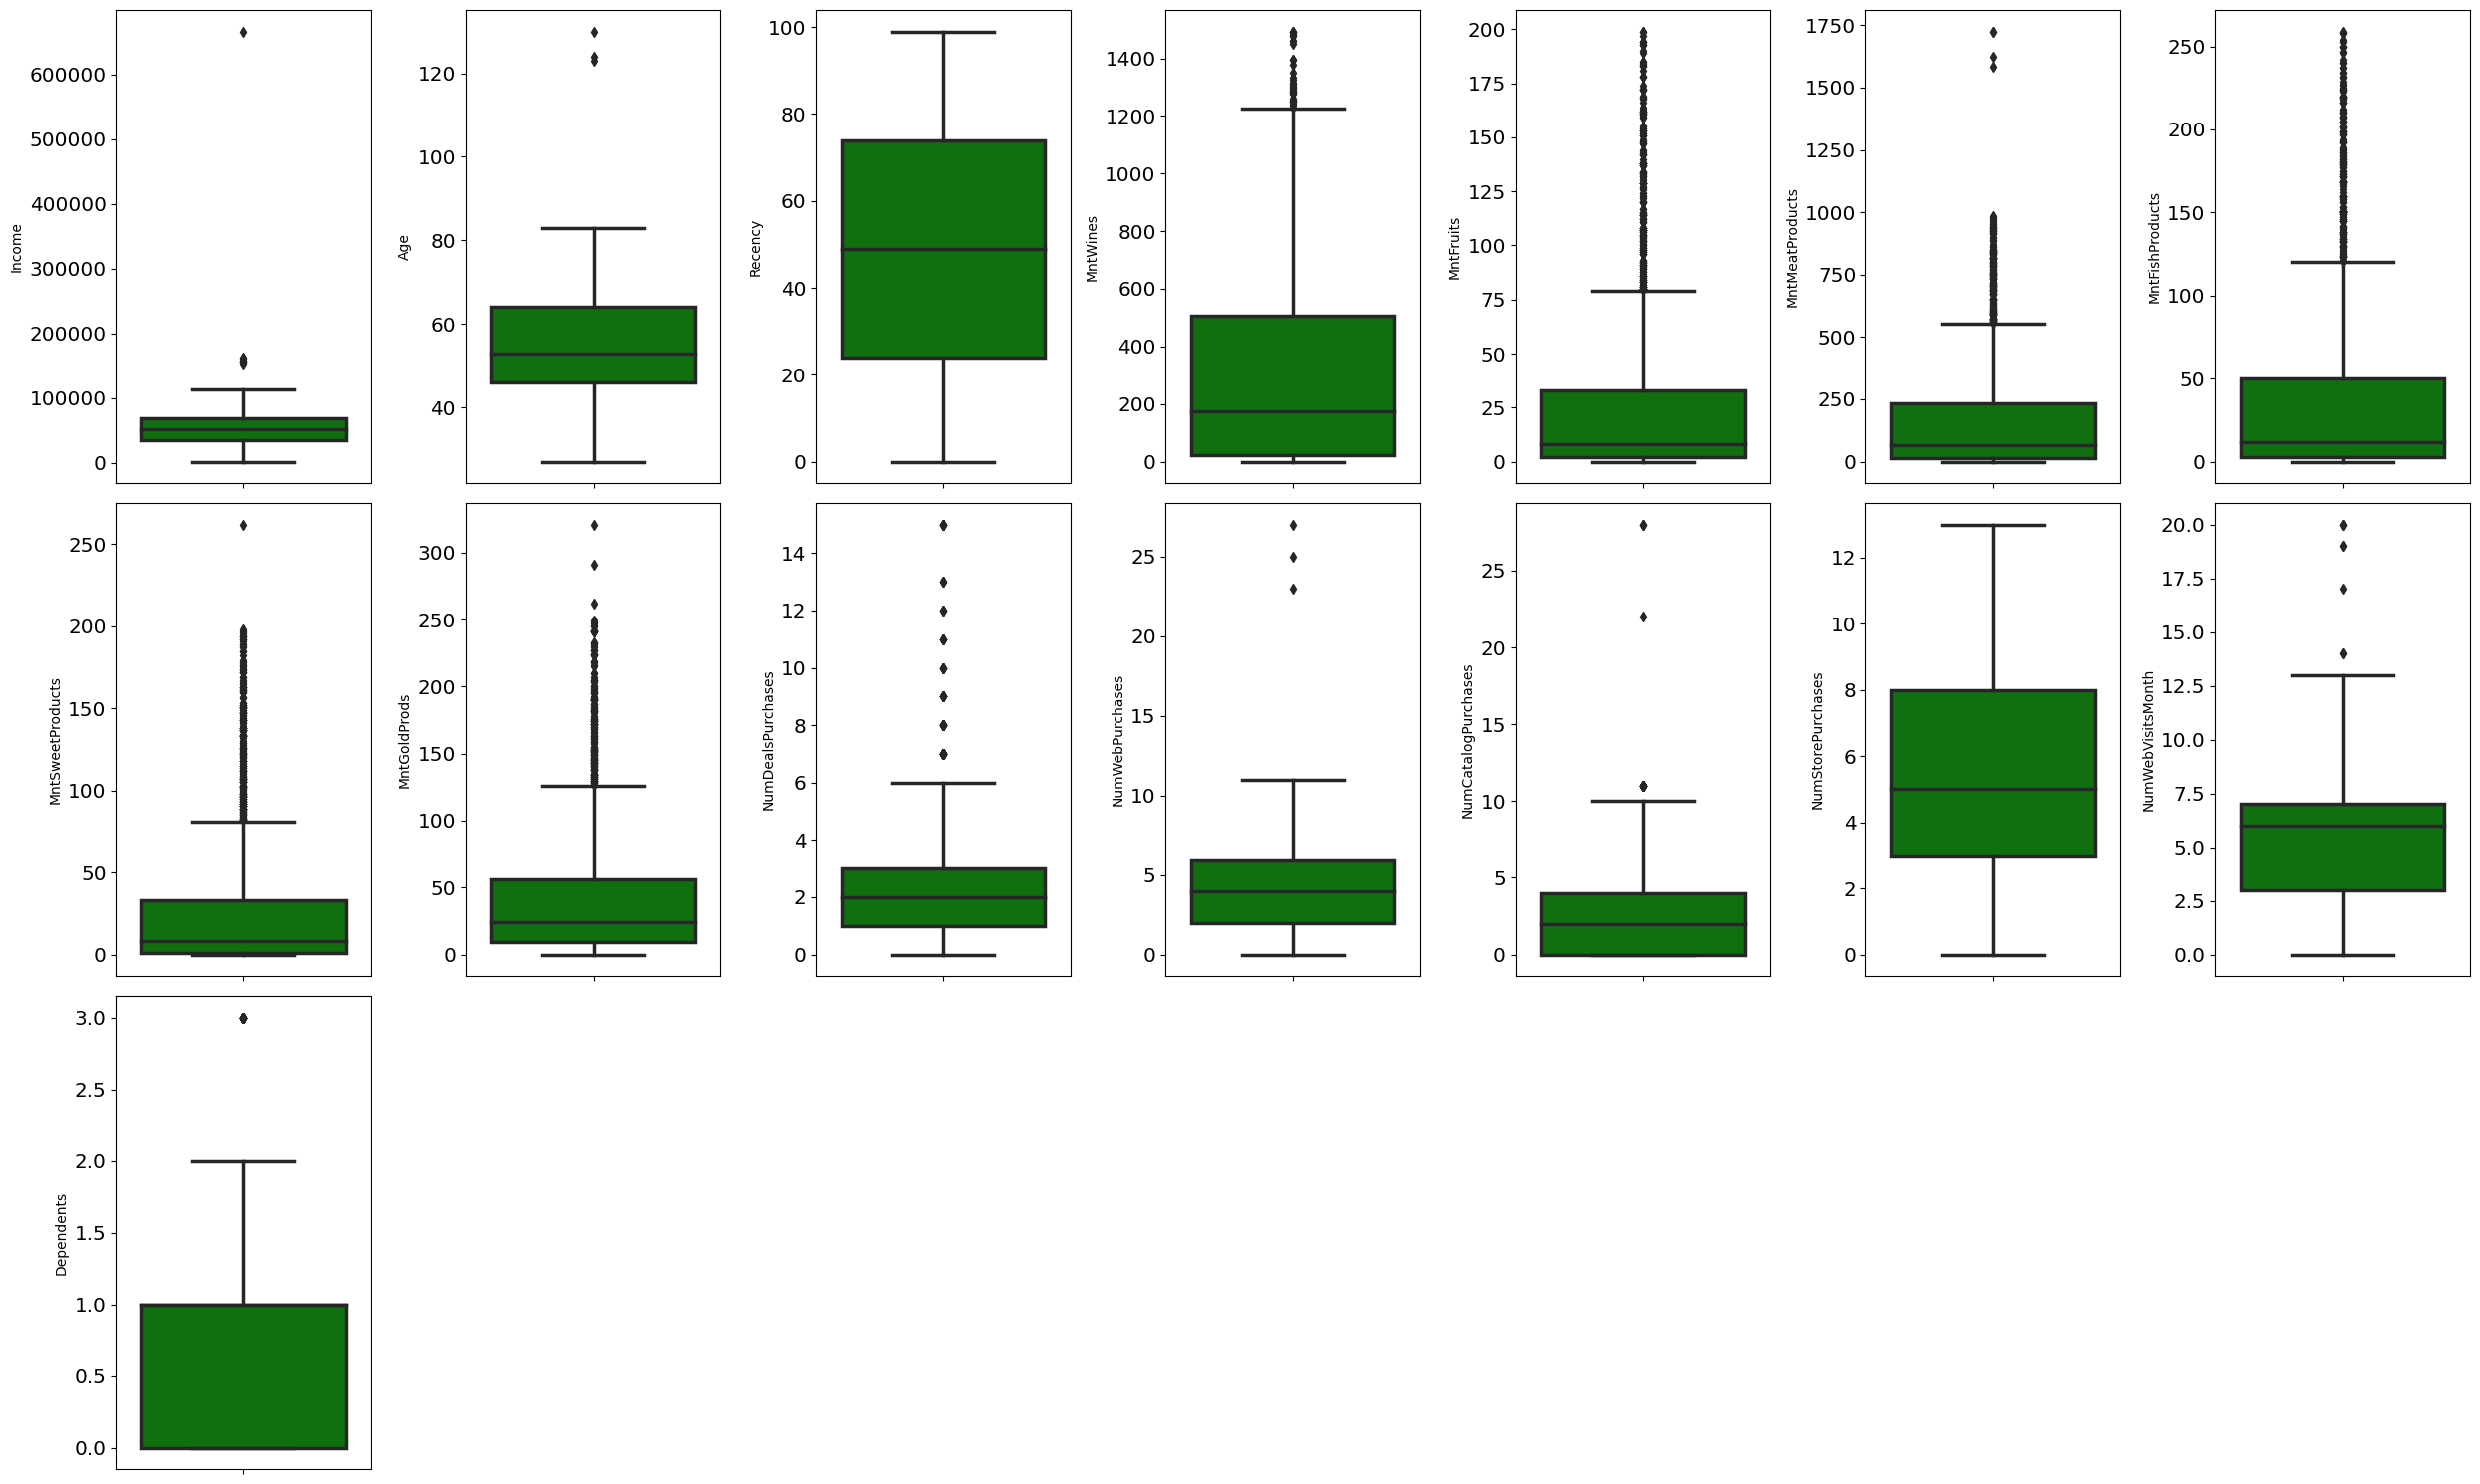

In [ ]:
nums=['Income','Age','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Dependents']

plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Diketahui kolom yang memiliki data outliers adalah:

- Income
- Age
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumWebVisitsMonth
- Dependents

Dikarenakan banyak kolom yang memiliki data outliers dan dataset hanya sedikit, diputuskan untuk mengahndle data outlier ini dengan melakukan log transformation.

### Log Transformation


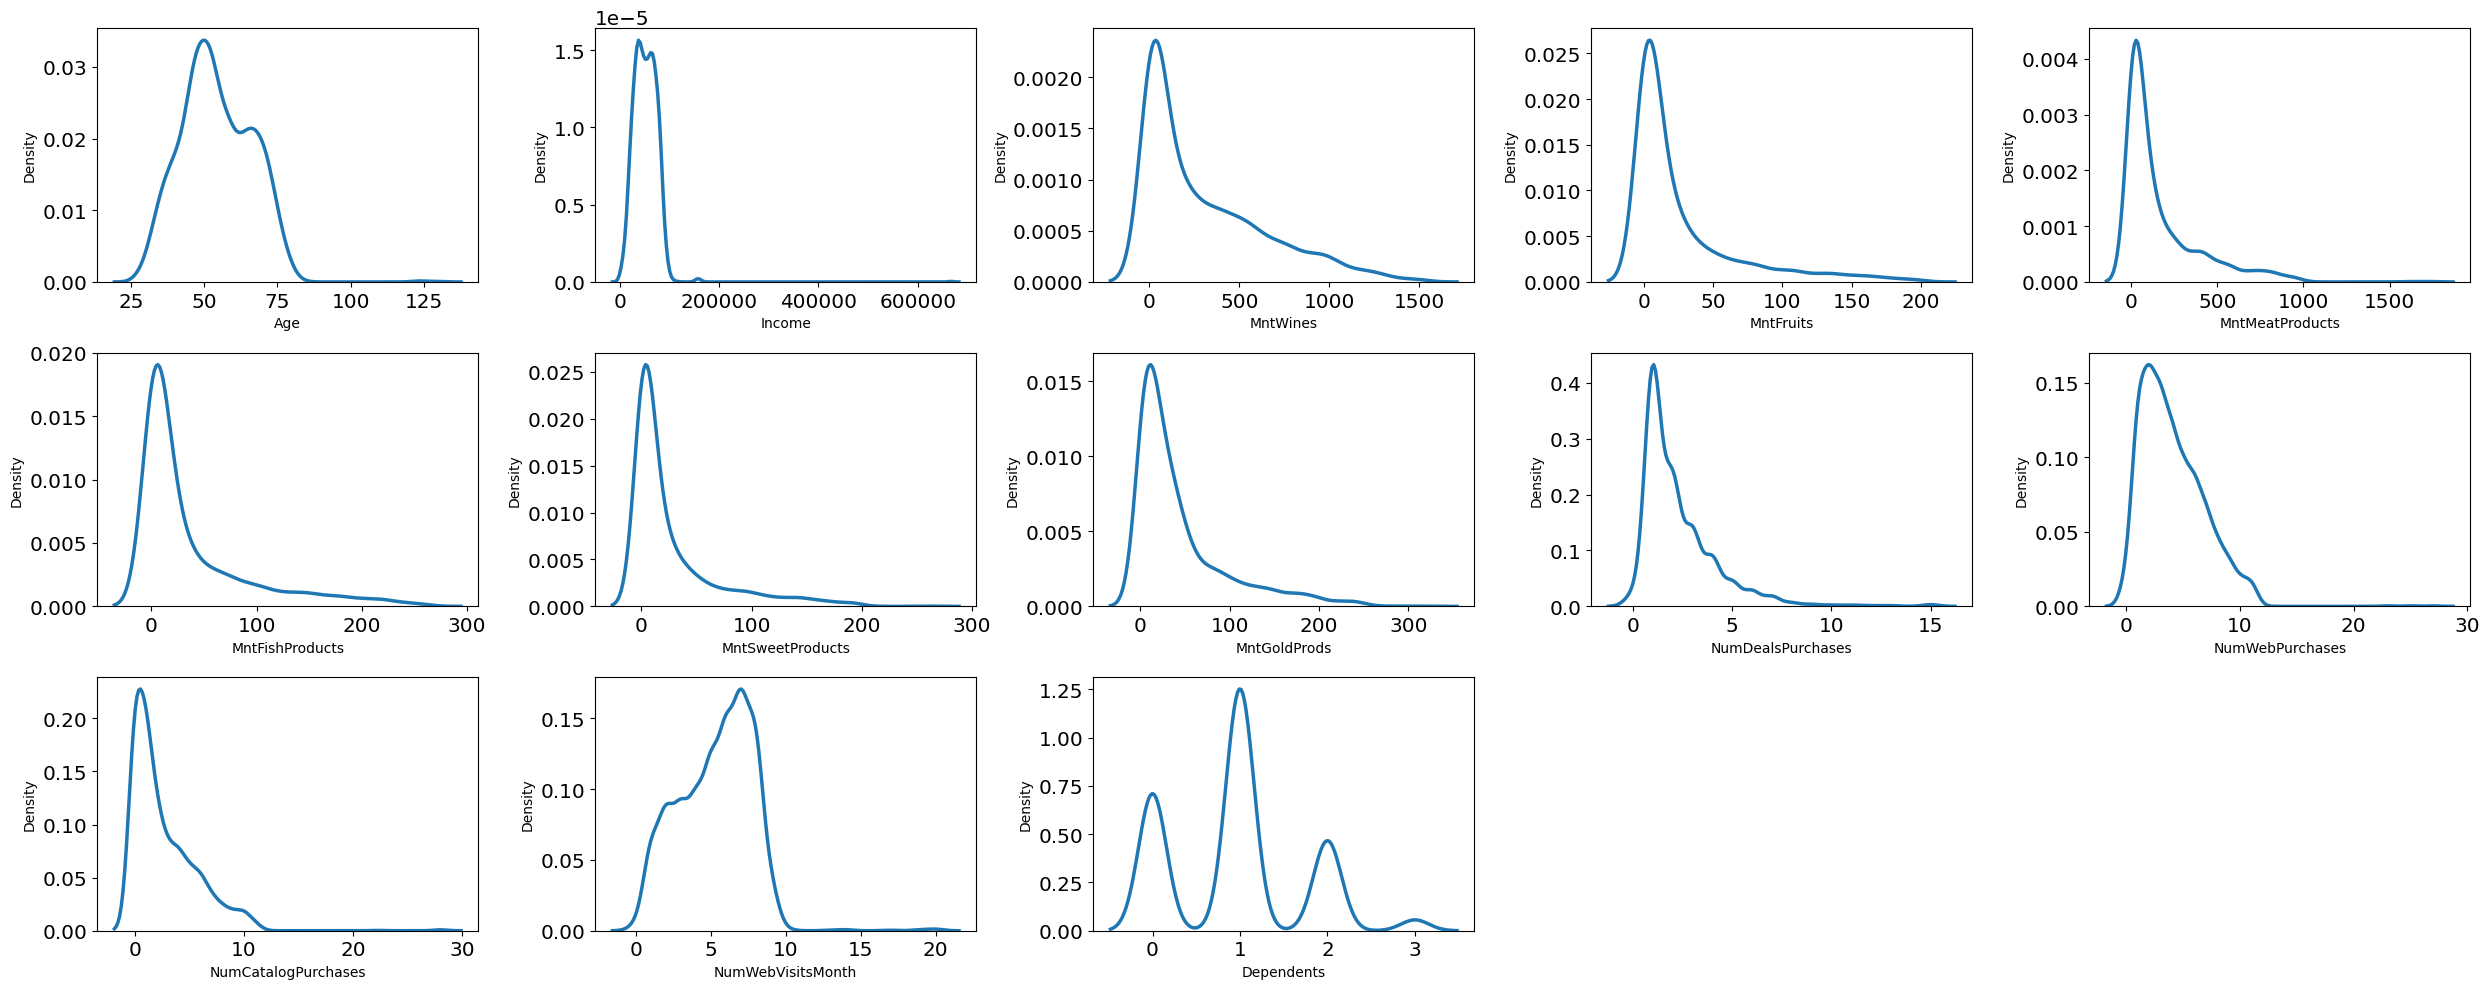

In [ ]:
data = ['Age', 'Income', 'MntWines', 'MntFruits', 
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
        'NumCatalogPurchases',  'NumWebVisitsMonth', 'Dependents']
plt.figure(figsize=(25, 10))

for i in range(0, len(data)):
  plt.subplot(3, 5, i+1)
  sns.kdeplot(df[data[i]])
  plt.tight_layout()

In [ ]:
for i in range(0, len(data)):
  skew = df[data[i]].skew(axis = 0, skipna = True)
  print(f'{data[i]}: {skew}')

Age: 0.35366147002882264
Income: 6.7634873728111184
MntWines: 1.1707200955543913
MntFruits: 2.101657525150595
MntMeatProducts: 2.0255768067844633
MntFishProducts: 1.916368950232168
MntSweetProducts: 2.1033275863706797
MntGoldProds: 1.8392309361295713
NumDealsPurchases: 2.415271762315824
NumWebPurchases: 1.1970370130708343
NumCatalogPurchases: 1.8810750511540515
NumWebVisitsMonth: 0.2180430456390019
Dependents: 0.4087482263114007


Berdasarkan website [oracle](https://https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html#:~:text=A%20skewness%20value%20greater%20than,the%20distribution%20is%20fairly%20symmetrical.) skew dianggap masih mempunyai distribusi simetris pada range -0.5 sampai 0.5. Maka dari itu akan dilakukan log transformation pada kolom:
Log Transformation:
- Income
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases

In [ ]:
log = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases']

df_log = df

In [ ]:
# Log Transformation
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson')

for i in range(0, len(log)):
  df_log[log[i]] = pt.fit_transform(df[[log[i]]])

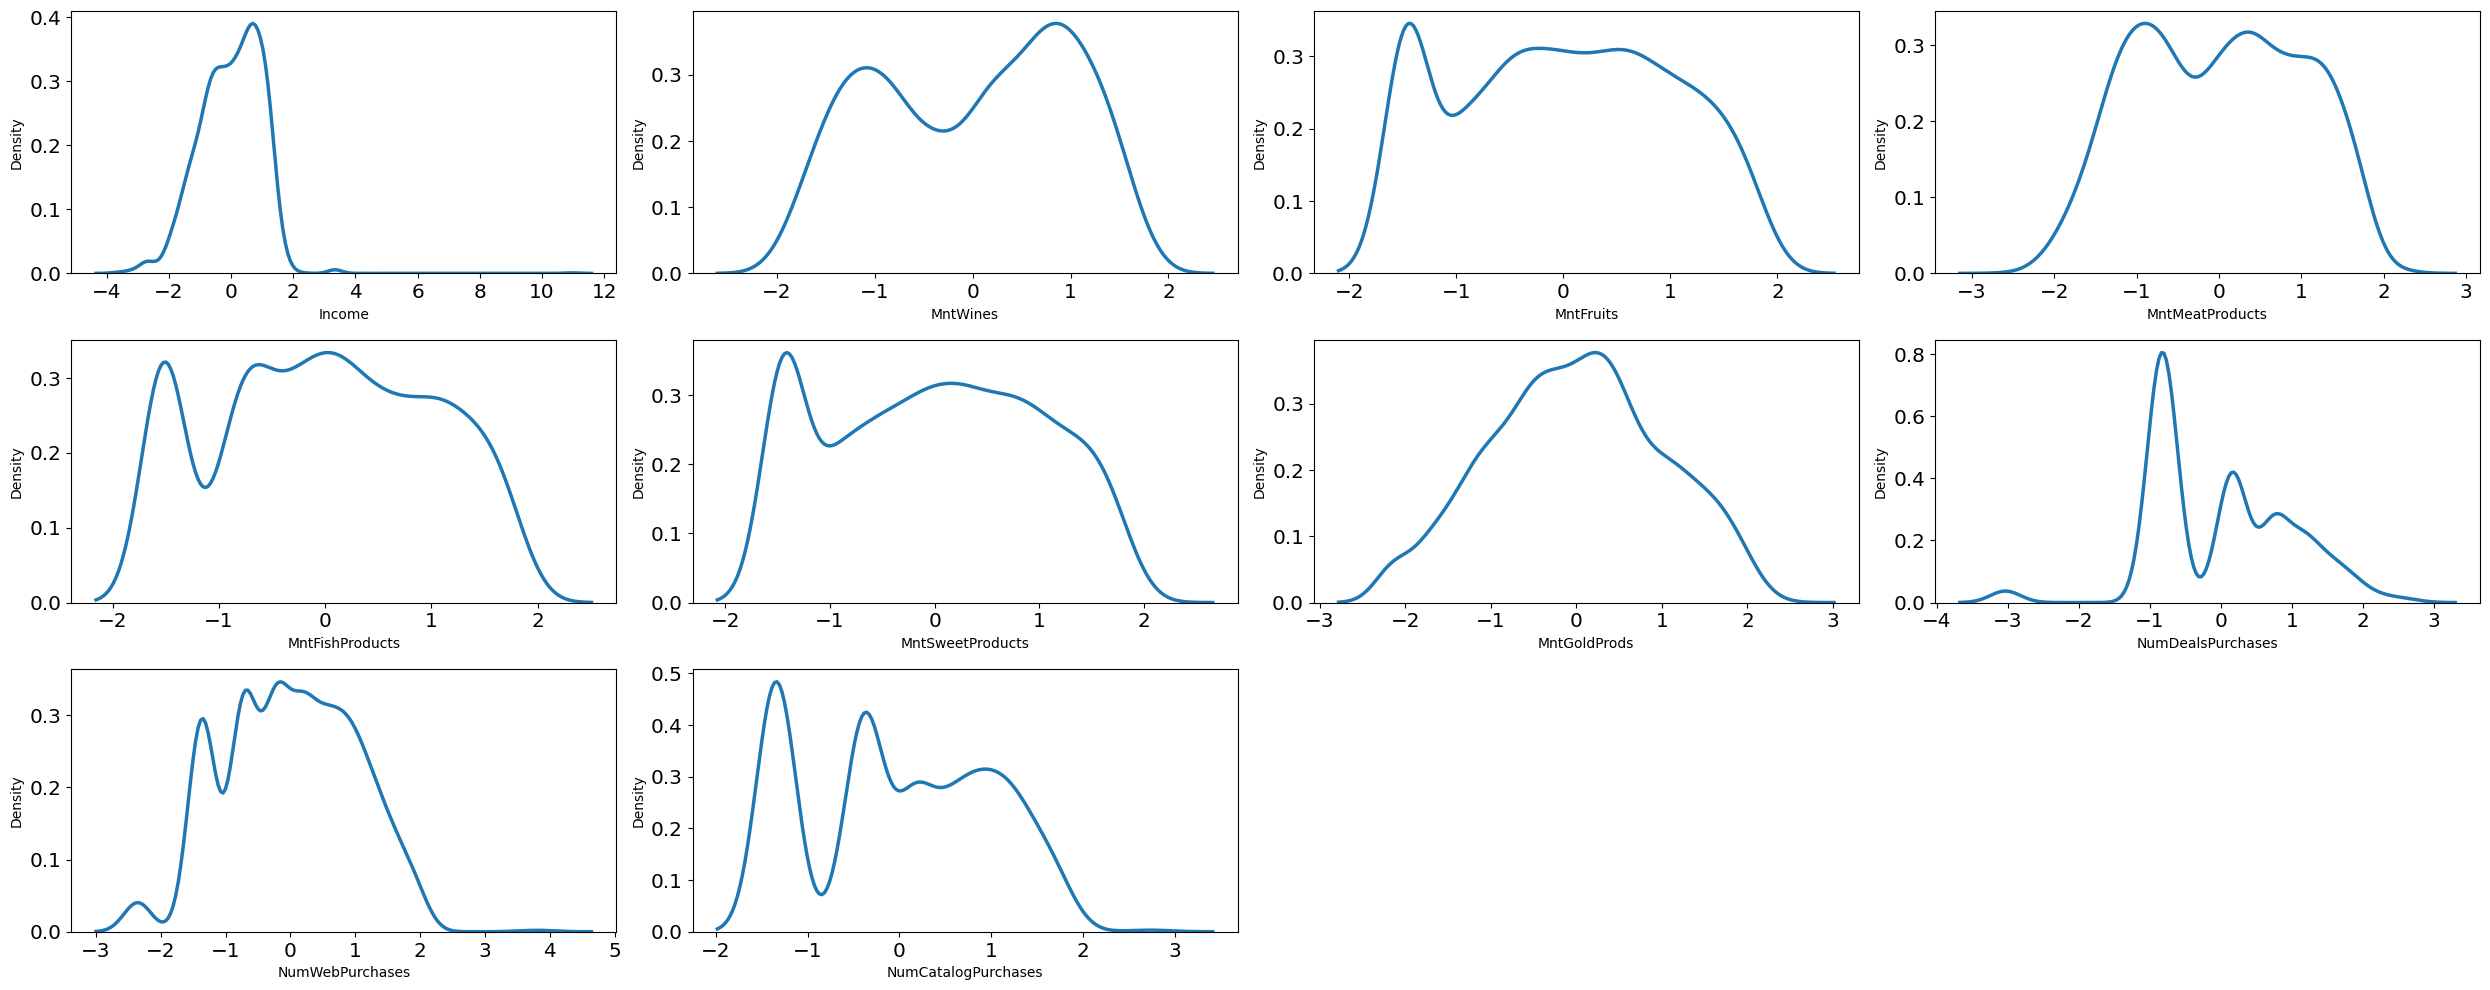

In [ ]:

plt.figure(figsize=(25, 10))

for i in range(0, len(log)):
  plt.subplot(3, 4, i+1)
  sns.kdeplot(df_log[log[i]])
  plt.tight_layout()

In [ ]:
for i in range(0, len(log)):
  skew = df[log[i]].skew(axis = 0, skipna = True)
  print(f'{log[i]}: {skew}')

Income: 0.22699764959433996
MntWines: -0.1480922845301341
MntFruits: 0.017998159066765402
MntMeatProducts: -0.01826741937645039
MntFishProducts: -0.011371185999283868
MntSweetProducts: 0.019469034400947823
MntGoldProds: -0.031229755683501722
NumDealsPurchases: 0.0008994549449180296
NumWebPurchases: -0.01969307884161518
NumCatalogPurchases: 0.029642199000975138


# Machine Learning Modeling

## Split Data

In [ ]:
X = df[['Age', 'Education', 'Status_Divorced', 'Status_Married',
       'Status_Others', 'Status_Single', 'Status_Widow', 'Income',
       'Dependents', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']]
y = df[['Response']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("X_train dataset: ", X_train.shape)  
print("y_train dataset: ", y_train.shape)  
print("X_test dataset: ", X_test.shape)  
print("y_test dataset: ", y_test.shape) 

X_train dataset:  (1551, 26)
y_train dataset:  (1551, 1)
X_test dataset:  (665, 26)
y_test dataset:  (665, 1)


<i>Data train sebanyak 1551 baris dan data test sebanyak 665 baris.</i>

## Handling Class Imbalance

In [ ]:
y_train['Response'].value_counts()

0    1318
1     233
Name: Response, dtype: int64

In [ ]:
(233/len(y_train))*100

15.022566086395875

<i>Dataset masih tidak seimbang dikarenakan hanya **15.02%** data yang mewakilkan customer merespon campaign.</i>

### Random Oversampling

In [ ]:
X_over_ro, y_over_ro = over_sampling.RandomOverSampler(random_state=43).fit_resample(X_train, y_train)

In [ ]:
X_over_ro.shape

(2636, 26)

In [ ]:
y_over_ro.shape

(2636, 1)

In [ ]:
y_over_ro['Response'].value_counts()

0    1318
1    1318
Name: Response, dtype: int64

### SMOTE

In [ ]:
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(random_state=44).fit_resample(X_train, y_train)

In [ ]:
X_over_SMOTE.shape

(2636, 26)

In [ ]:
y_over_SMOTE.shape

(2636, 1)

In [ ]:
y_over_SMOTE['Response'].value_counts()

0    1318
1    1318
Name: Response, dtype: int64

<i><b>Declare function and model fitting using 5 different algorithms for each oversampling method then choose the best method and the top 3 algorithms for next hyperparameter tuning</b></i>

## Data Without Class Imbalance Handling

### Declaring Functions

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

def eval_clf_imbalance(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    cls_report_imbalance_train = classification_report(y_train, y_pred_train)
    print(f"Classification Report (Train) : \n {cls_report_imbalance_train}")
    cls_report_imbalance_test = classification_report(y_test, y_pred)
    print(f"Classification Report (Test) : \n {cls_report_imbalance_test}")
    
    acc_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    # print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(), 4)))
    # print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(), 4)))
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

### Model Fitting

Algoritma yang akan digunakan:
- Logistic Reggresion
- Decision Tree
- Random Forest
- XGBoost
- AdaBoost

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier 

from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'XGB Classifier', 'AdaBoost Classifier']
algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, AdaBoostClassifier]

# Result List
acc_test_ni = []
precision_test_ni = []
recall_test_ni = []
f1_test_ni = []
roc_auc_train_ni = []
roc_auc_test_ni = []
roc_auc_crossval_train_ni = []
roc_auc_crossval_test_ni = []

In [ ]:
# Model Evaluation using Imbalance Data
i = 0

for model_type in algorithms:
    # Fitting and using the algorithms
    model = model_type()
    model.fit(X_train, y_train)
    print(models[i])
    result = eval_clf_imbalance(model)
    
    # Adding the results to the list
    acc_test_ni.append(result['Test Accuracy'])
    precision_test_ni.append(result['Test Precision'])
    recall_test_ni.append(result['Test Recall'])
    f1_test_ni.append(result['Test F1'])
    roc_auc_train_ni.append(result['Train ROC AUC'])
    roc_auc_test_ni.append(result['Test ROC AUC'])
    roc_auc_crossval_train_ni.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test_ni.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1318
           1       0.73      0.45      0.56       233

    accuracy                           0.89      1551
   macro avg       0.82      0.71      0.75      1551
weighted avg       0.88      0.89      0.88      1551

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       565
           1       0.67      0.38      0.48       100

    accuracy                           0.88       665
   macro avg       0.78      0.67      0.71       665
weighted avg       0.86      0.88      0.86       665

Decision Tree
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      0.98      0.99       233

    accuracy                           1.00    

### Fitting Result

In [ ]:
imbalance_data_df = pd.DataFrame(list(zip(models, acc_test_ni, precision_test_ni, recall_test_ni, f1_test_ni, roc_auc_train_ni, roc_auc_test_ni, roc_auc_crossval_train_ni, roc_auc_crossval_test_ni)), columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])

In [ ]:
imbalance_data_df

,Model,Test Accuracy,Test Precision,Test Recall,Test F1,Train ROC AUC,Test ROC AUC,Crossval Train ROC AUC,Crossval Test ROC AUC
0,Logistic Regression,0.878195,0.666667,0.38,0.484076,0.882100,0.904752,0.8921,0.8800
1,Decision Tree,0.830075,0.432990,0.42,0.426396,0.999972,0.661327,0.9998,0.6959
2,Random Forest Classifier,0.888722,0.795455,0.35,0.486111,0.999972,0.869735,0.9998,0.8775
3,XGB Classifier,0.873684,0.625000,0.40,0.487805,0.999972,0.882681,0.9998,0.8848
4,AdaBoost Classifier,0.872180,0.602740,0.44,0.508671,0.934343,0.877230,0.9327,0.8800


## Data After Random Oversampling

### Declaring Function

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

def eval_clf_ro(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_ro)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_ro)
    
    cls_report_ro_train = classification_report(y_over_ro, y_pred_train)
    print(f"Classification Report (Train) : \n {cls_report_ro_train}")
    cls_report_ro_test = classification_report(y_test, y_pred)
    print(f"Classification Report (Test) : \n {cls_report_ro_test}")
    
    
    acc_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_over_ro, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    # print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(), 4)))
    # print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(), 4)))
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    print(model.best_estimator_.get_params())

### Model Fitting

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'XGB Classifier', 'AdaBoost Classifier']
algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, AdaBoostClassifier]

# Result List
acc_test_ro = []
precision_test_ro = []
recall_test_ro = []
f1_test_ro = []
roc_auc_train_ro = []
roc_auc_test_ro = []
roc_auc_crossval_train_ro = []
roc_auc_crossval_test_ro = []

In [ ]:
# Model Evaluation using Random Oversampling Data
i = 0

for model_type in algorithms:
    # Fitting and using the algorithms
    model = model_type()
    model.fit(X_over_ro, y_over_ro)
    print(models[i])
    result = eval_clf_ro(model)
    
    # Adding the results to the list
    acc_test_ro.append(result['Test Accuracy'])
    precision_test_ro.append(result['Test Precision'])
    recall_test_ro.append(result['Test Recall'])
    f1_test_ro.append(result['Test F1'])
    roc_auc_train_ro.append(result['Train ROC AUC'])
    roc_auc_test_ro.append(result['Test ROC AUC'])
    roc_auc_crossval_train_ro.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test_ro.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1318
           1       0.82      0.81      0.81      1318

    accuracy                           0.81      2636
   macro avg       0.81      0.81      0.81      2636
weighted avg       0.81      0.81      0.81      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       565
           1       0.48      0.84      0.61       100

    accuracy                           0.84       665
   macro avg       0.72      0.84      0.75       665
weighted avg       0.89      0.84      0.86       665

Decision Tree
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00    

### Fitting Result

In [ ]:
ro_df = pd.DataFrame(list(zip(models, acc_test_ro, precision_test_ro, recall_test_ro, f1_test_ro, roc_auc_train_ro, roc_auc_test_ro, roc_auc_crossval_train_ro, roc_auc_crossval_test_ro)), columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])
ro_df

,Model,Test Accuracy,Test Precision,Test Recall,Test F1,Train ROC AUC,Test ROC AUC,Crossval Train ROC AUC,Crossval Test ROC AUC
0,Logistic Regression,0.839098,0.480000,0.84,0.610909,0.893561,0.913230,0.8921,0.8800
1,Decision Tree,0.827068,0.422680,0.41,0.416244,0.999974,0.655442,0.9998,0.6884
2,Random Forest Classifier,0.878195,0.655738,0.40,0.496894,0.999968,0.883274,0.9998,0.8791
3,XGB Classifier,0.866165,0.563218,0.49,0.524064,0.999974,0.861372,0.9998,0.8848
4,AdaBoost Classifier,0.827068,0.453988,0.74,0.562738,0.938959,0.884735,0.9327,0.8800


## Data After Oversampling with SMOTE

### Declaring Function

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

def eval_clf_SMOTE(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    
    cls_report_smote_train = classification_report(y_over_SMOTE, y_pred_train)
    print(f"Classification Report (Train) : \n {cls_report_smote_train}")
    cls_report_smote_test = classification_report(y_test, y_pred)
    print(f"Classification Report (Test) : \n {cls_report_smote_test}")

    acc_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    # print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(), 4)))
    # print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(), 4)))
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    print(model.best_estimator_.get_params())

### Model Fitting

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'XGB Classifier', 'AdaBoost Classifier']
algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, AdaBoostClassifier]

# Result List
acc_test = []
precision_test = []
recall_test = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
roc_auc_crossval_train = []
roc_auc_crossval_test = []

In [ ]:
### Model Evaluation using SMOTE Data
i = 0

for model_type in algorithms:
    # Fitting and using the algorithms
    model = model_type()
    model.fit(X_over_SMOTE, y_over_SMOTE)
    print(models[i])
    result = eval_clf_SMOTE(model)
    
    # Adding the results to the list
    acc_test.append(result['Test Accuracy'])
    precision_test.append(result['Test Precision'])
    recall_test.append(result['Test Recall'])
    f1_test.append(result['Test F1'])
    roc_auc_train.append(result['Train ROC AUC'])
    roc_auc_test.append(result['Test ROC AUC'])
    roc_auc_crossval_train.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1318
           1       0.85      0.82      0.83      1318

    accuracy                           0.84      2636
   macro avg       0.84      0.84      0.84      2636
weighted avg       0.84      0.84      0.84      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       565
           1       0.49      0.68      0.57       100

    accuracy                           0.85       665
   macro avg       0.72      0.78      0.74       665
weighted avg       0.87      0.85      0.86       665

Decision Tree
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00    

### Fitting Result

In [ ]:
smote_df = pd.DataFrame(list(zip(models, acc_test, precision_test, recall_test, f1_test, roc_auc_train, 
                                 roc_auc_test, roc_auc_crossval_train, roc_auc_crossval_test)), 
                        columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 
                                 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])
smote_df

,Model,Test Accuracy,Test Precision,Test Recall,Test F1,Train ROC AUC,Test ROC AUC,Crossval Train ROC AUC,Crossval Test ROC AUC
0,Logistic Regression,0.846617,0.492754,0.68,0.571429,0.922454,0.883283,0.8921,0.8800
1,Decision Tree,0.781955,0.310924,0.37,0.337900,0.999995,0.616150,0.9998,0.6955
2,Random Forest Classifier,0.867669,0.575000,0.46,0.511111,0.999993,0.861363,0.9998,0.8775
3,XGB Classifier,0.860150,0.545455,0.42,0.474576,0.999995,0.863354,0.9998,0.8848
4,AdaBoost Classifier,0.821053,0.425197,0.54,0.475771,0.967699,0.841319,0.9327,0.8800


<i>After testing several oversampling methods, it was found that **Random Oversampling** was the best method and the top 3 algorithms were **Random Forest, XGBoost, AdaBoost**. then hyperparameter tuning will be done because it still tends to overfit</i>

## Modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
def get_metrics(y_pred, y_act, model_name):
    recall =  recall_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    roc_auc = roc_auc_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)
    accuracy = balanced_accuracy_score(y_act, y_pred)

    metrics_result = dict(model_name=model_name, 
                        recall=recall, 
                        precision=precision, 
                        roc_auc=roc_auc, 
                        f1=f1,
                        accuracy=accuracy)
    return metrics_result


def prediction(X_train, y_train, X_test, y_test, clf, model_name='decision tree'):
  
    clf = clf
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)


    result = dict()
    test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
    train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

    result['test'] = test_result
    result['train'] = train_result
    result['y_test'] = y_test
    result['y_test_pred'] = y_test_pred
    result['y_train'] = y_train
    result['y_train_pred'] = y_train_pred
    result['clf'] = clf
    result['x_train'] = X_train
    result['x_test'] = X_test

    del clf

    return result
  
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Random Forest 

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_over_ro, y_over_ro)
eval_clf_ro(rf)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       565
           1       0.70      0.40      0.51       100

    accuracy                           0.88       665
   macro avg       0.80      0.68      0.72       665
weighted avg       0.87      0.88      0.87       665



{'Test Accuracy': 0.8842105263157894,
 'Test Precision': 0.7017543859649122,
 'Test Recall': 0.4,
 'Test F1': 0.5095541401273885,
 'Train ROC AUC': 0.9999683384720952,
 'Test ROC AUC': 0.8659203539823009,
 'Crossval Train ROC AUC': 0.9998,
 'Crossval Test ROC AUC': 0.8774}

In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Hyperparameter Tuning

In [ ]:


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 20)], # Jumlah subtree 
                       bootstrap = [True, False], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1] # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Predict & Evaluation
rf_hyper = prediction(X_over_ro, y_over_ro, X_test, y_test, rf_tuned, model_name='random forest_hyperparam')


In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 158
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [ ]:
from numpy.ma.core import log2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
rf2 = RandomForestClassifier(n_estimators = 158, 
                              bootstrap = True, 
                              criterion = 'gini',
                              max_depth = 110,  
                              min_samples_split = 4, 
                              min_samples_leaf = 1, 
                              max_features = 'log2', 
                              n_jobs = -1,
                              random_state = 42)
rf2.fit(X_over_ro, y_over_ro)
# rf2_pred = rf2.predict(X_test)
# rf2_pred_train = rf2.predict(X_over_ro)
eval_clf_ro(rf2)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       565
           1       0.68      0.41      0.51       100

    accuracy                           0.88       665
   macro avg       0.79      0.69      0.72       665
weighted avg       0.87      0.88      0.87       665



{'Test Accuracy': 0.8827067669172932,
 'Test Precision': 0.6833333333333333,
 'Test Recall': 0.41,
 'Test F1': 0.5125000000000001,
 'Train ROC AUC': 0.9999441605780589,
 'Test ROC AUC': 0.8772212389380531,
 'Crossval Train ROC AUC': 0.9997,
 'Crossval Test ROC AUC': 0.8801}

#### Learning Curve

param value: 1; train: 0.986786205244991; test: 0.8951946902654867
param value: 2; train: 0.9860775626840687; test: 0.8923274336283185
param value: 3; train: 0.9845002429302686; test: 0.8918849557522124
param value: 5; train: 0.9833857571480218; test: 0.8939026548672566
param value: 6; train: 0.9818959383440675; test: 0.8955486725663716
param value: 7; train: 0.9802927137038; test: 0.8953362831858408
param value: 9; train: 0.9783037940872386; test: 0.8936548672566371
param value: 10; train: 0.9764069807336724; test: 0.8944867256637168
param value: 11; train: 0.9751376412967642; test: 0.8948938053097346
param value: 13; train: 0.9726617098146131; test: 0.894787610619469
param value: 14; train: 0.9704327382501191; test: 0.896221238938053
param value: 15; train: 0.9693873321651189; test: 0.8931592920353983
param value: 17; train: 0.9667041615912279; test: 0.8918672566371681
param value: 18; train: 0.9640670441488345; test: 0.8904867256637167
param value: 20; train: 0.9598825414881149; tes

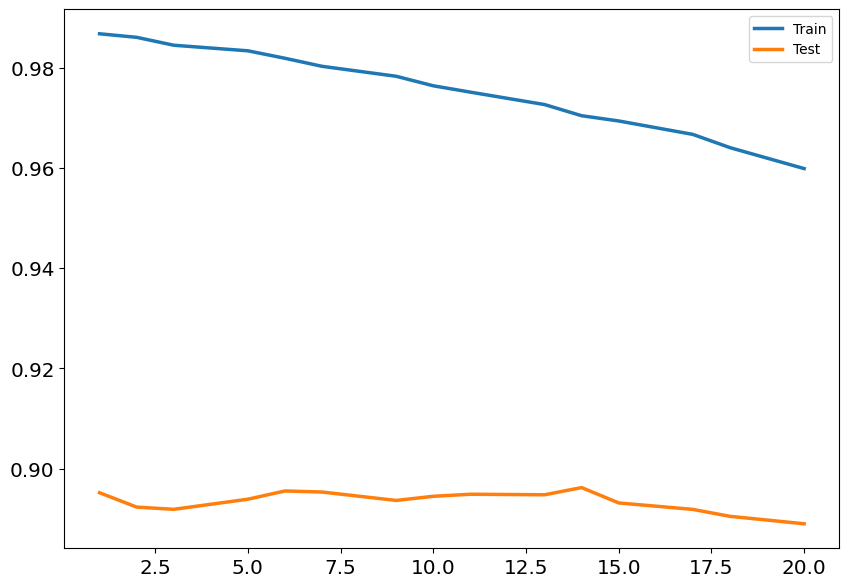

In [ ]:
# Learning curve
# param_values = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 110, num = 50)] # max_depth
# param_values = [int(x) for x in np.linspace(start = 2, stop = 20, num = 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(start = 1, stop = 20, num = 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
  model = RandomForestClassifier(n_estimators = 560, max_depth = 7, min_samples_split = 17, min_samples_leaf = c) 

  model.fit(X_over_ro, y_over_ro)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_over_ro)
  train_auc = roc_auc_score(y_over_ro, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Fitting Result

In [ ]:
rfc = RandomForestClassifier(n_estimators = 560, 
                       bootstrap = True, 
                       criterion = 'gini',
                       max_depth = 7,  
                       min_samples_split = 17, 
                       min_samples_leaf = 15, 
                       max_features = 'log2', 
                       n_jobs = -1,
                       random_state = 42)
rfc.fit(X_over_ro, y_over_ro)
eval_clf_ro(rfc)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1318
           1       0.90      0.90      0.90      1318

    accuracy                           0.90      2636
   macro avg       0.90      0.90      0.90      2636
weighted avg       0.90      0.90      0.90      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       565
           1       0.50      0.70      0.59       100

    accuracy                           0.85       665
   macro avg       0.72      0.79      0.75       665
weighted avg       0.88      0.85      0.86       665



{'Test Accuracy': 0.8511278195488722,
 'Test Precision': 0.5035971223021583,
 'Test Recall': 0.7,
 'Test F1': 0.5857740585774058,
 'Train ROC AUC': 0.9684294270299644,
 'Test ROC AUC': 0.8929469026548671,
 'Crossval Train ROC AUC': 0.9301,
 'Crossval Test ROC AUC': 0.8703}

#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

rfc_pred = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_over_ro)

rfc_cm = confusion_matrix(y_test, rfc_pred)
print(rfc_cm)

[[496  69]
 [ 30  70]]


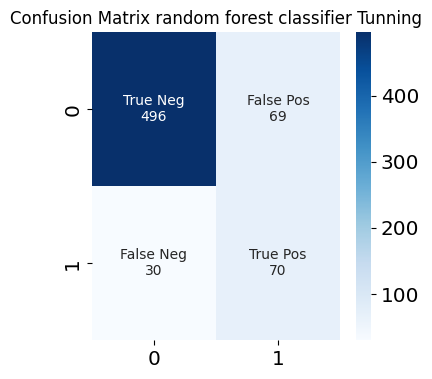

In [ ]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                rfc_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(4,4))
sns.heatmap(rfc_cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix random forest classifier Tunning')
# plt.savefig('Confusion Matrix random forest classifier.png')
plt.show()

### XGBoost

In [ ]:
xg = xgb.XGBClassifier(random_state = 42)
xg.fit(X_over_ro, y_over_ro)
eval_clf_ro(xg)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       565
           1       0.56      0.49      0.52       100

    accuracy                           0.87       665
   macro avg       0.74      0.71      0.72       665
weighted avg       0.86      0.87      0.86       665



{'Test Accuracy': 0.8661654135338346,
 'Test Precision': 0.5632183908045977,
 'Test Recall': 0.49,
 'Test F1': 0.5240641711229945,
 'Train ROC AUC': 0.9999740951135325,
 'Test ROC AUC': 0.8613716814159292,
 'Crossval Train ROC AUC': 0.9998,
 'Crossval Test ROC AUC': 0.8848}

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = xgb.XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Predict & Evaluation
xg_hyper = prediction(X_over_ro, y_over_ro, X_test, y_test, xg_tuned, model_name='xgboost_hyperparam')

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 50
Best min_child_weight: 2
Best gamma: 0.1
Best tree_method: approx
Best colsample_bytree: 0.7000000000000001
Best eta: 0.8484848484848485
Best alpha: 0.9


In [ ]:
from numpy.ma.core import log2
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
xg2 = xgb.XGBClassifier(max_depth = 50,
                 min_child_weight = 2,
                 gamma = 0.1,
                 tree_method = 'approx',
                 colsample_bytree = 0.7000000000000001,
                 eta = 0.8484848484848485,
                 alpha = 0.9)

xg2.fit(X_over_ro, y_over_ro)
xg2_pred = xg2.predict(X_test)
xg2_pred_train = xg2.predict(X_over_ro)
eval_clf_ro(xg2)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       565
           1       0.56      0.48      0.52       100

    accuracy                           0.86       665
   macro avg       0.73      0.71      0.72       665
weighted avg       0.86      0.86      0.86       665



{'Test Accuracy': 0.8646616541353384,
 'Test Precision': 0.5581395348837209,
 'Test Recall': 0.48,
 'Test F1': 0.5161290322580644,
 'Train ROC AUC': 0.9999660358155203,
 'Test ROC AUC': 0.8702035398230088,
 'Crossval Train ROC AUC': 0.9996,
 'Crossval Test ROC AUC': 0.8681}

#### Learning Curve

param value: 1; train: 0.9259304459554989; test: 0.8949999999999999
param value: 2; train: 0.9792530642602371; test: 0.8909469026548672
param value: 3; train: 0.9932693348315952; test: 0.877637168141593
param value: 4; train: 0.9971170739682371; test: 0.8758141592920353
param value: 5; train: 0.9988895438667591; test: 0.8758318584070796
param value: 6; train: 0.9990271275971088; test: 0.8837433628318584
param value: 7; train: 0.9989263863719574; test: 0.8814424778761061
param value: 8; train: 0.9992890547825027; test: 0.8907522123893805
param value: 9; train: 0.9993834637020732; test: 0.8814070796460177
param value: 10; train: 0.9989845284504734; test: 0.8733185840707965
param value: 11; train: 0.9993644667853302; test: 0.8815486725663717
param value: 12; train: 0.9991255661656853; test: 0.8847699115044247
param value: 13; train: 0.9991255661656853; test: 0.8847699115044247
param value: 14; train: 0.9991255661656853; test: 0.8847699115044247
param value: 15; train: 0.9991255661656853; 

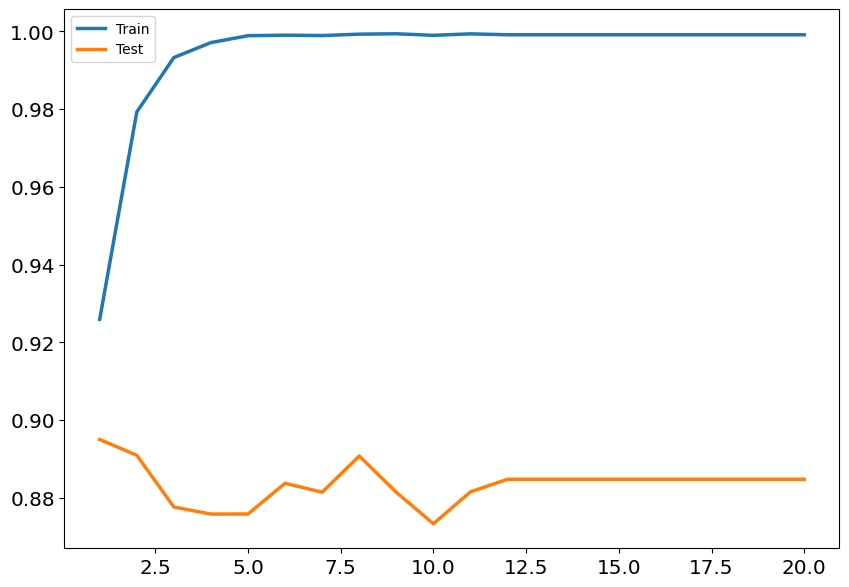

In [ ]:
# Learning curve
param_values = [int(x) for x in np.linspace(1, 20, 20)] # max_depth
# param_values = [int(x) for x in np.linspace(1, 20, 20)] # min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] # gamma
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] # colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] # eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] # alpha

train_scores = []
test_scores = []

for c in param_values:
  model = XGBClassifier(max_depth=c, min_child_weight=17, colsample_bytree=1.0)
  
  model.fit(X_over_ro, y_over_ro)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_over_ro)
  train_auc = roc_auc_score(y_over_ro, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Fitting Result

In [ ]:
xgc = XGBClassifier(max_depth=3, min_child_weight=17, colsample_bytree=1, 
                    random_state = 42)
xgc.fit(X_over_ro, y_over_ro)
eval_clf_ro(xgc)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      1318
           1       0.94      0.99      0.97      1318

    accuracy                           0.97      2636
   macro avg       0.97      0.97      0.97      2636
weighted avg       0.97      0.97      0.97      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       565
           1       0.52      0.62      0.56       100

    accuracy                           0.86       665
   macro avg       0.72      0.76      0.74       665
weighted avg       0.87      0.86      0.86       665



{'Test Accuracy': 0.8556390977443609,
 'Test Precision': 0.5166666666666667,
 'Test Recall': 0.62,
 'Test F1': 0.5636363636363637,
 'Train ROC AUC': 0.9932693348315952,
 'Test ROC AUC': 0.877637168141593,
 'Crossval Train ROC AUC': 0.974,
 'Crossval Test ROC AUC': 0.8871}

#### Confusion Matrix

In [ ]:
xgc_pred = xgc.predict(X_test)
xgc_pred_train = xgc.predict(X_over_ro)

xgc_cm = confusion_matrix(y_test, xgc_pred)
print(xgc_cm)

[[507  58]
 [ 38  62]]


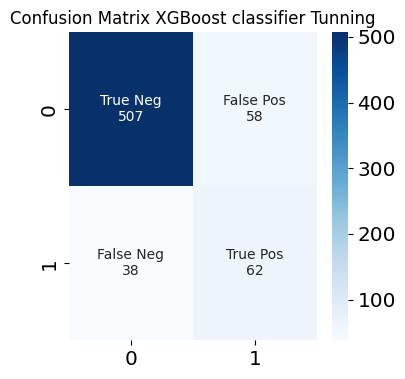

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                xgc_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(4,4))
sns.heatmap(xgc_cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix XGBoost classifier Tunning')
# plt.savefig('Confusion Matrix random forest classifier.png')
plt.show()

### AdaBoost

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_over_ro, y_over_ro)
eval_clf_ro(ab)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1318
           1       0.86      0.86      0.86      1318

    accuracy                           0.86      2636
   macro avg       0.86      0.86      0.86      2636
weighted avg       0.86      0.86      0.86      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       565
           1       0.45      0.74      0.56       100

    accuracy                           0.83       665
   macro avg       0.70      0.79      0.73       665
weighted avg       0.87      0.83      0.84       665



{'Test Accuracy': 0.8270676691729323,
 'Test Precision': 0.4539877300613497,
 'Test Recall': 0.74,
 'Test F1': 0.5627376425855513,
 'Train ROC AUC': 0.9389594525203727,
 'Test ROC AUC': 0.8847345132743363,
 'Crossval Train ROC AUC': 0.9327,
 'Crossval Test ROC AUC': 0.88}

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')

# Predict & Evaluation
ab_hyper = prediction(X_over_ro, y_over_ro, X_test, y_test, ab_tuned, model_name='adaboost_hyperparam')

In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1700
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R


In [ ]:
from numpy.ma.core import log2
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
ab2 = AdaBoostClassifier(n_estimators = 1700,
                        learning_rate = 0.07394736842105264,
                        algorithm = 'SAMME.R')

ab2.fit(X_over_ro, y_over_ro)
ab2_pred = ab2.predict(X_test)
ab2_pred_train = ab2.predict(X_over_ro)
eval_clf_ro(ab2)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1318
           1       0.88      0.89      0.89      1318

    accuracy                           0.89      2636
   macro avg       0.89      0.89      0.89      2636
weighted avg       0.89      0.89      0.89      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       565
           1       0.48      0.74      0.58       100

    accuracy                           0.84       665
   macro avg       0.71      0.80      0.74       665
weighted avg       0.88      0.84      0.85       665



{'Test Accuracy': 0.8390977443609022,
 'Test Precision': 0.4774193548387097,
 'Test Recall': 0.74,
 'Test F1': 0.5803921568627451,
 'Train ROC AUC': 0.9589770217900393,
 'Test ROC AUC': 0.8898141592920354,
 'Crossval Train ROC AUC': 0.9514,
 'Crossval Test ROC AUC': 0.8799}

#### Learning Curve

param value: 0.001; train: 0.7479820093441805; test: 0.7449646017699115
param value: 0.021387755102040818; train: 0.8692724296020318; test: 0.8685398230088496
param value: 0.041775510204081635; train: 0.8945190441212026; test: 0.8867522123893805
param value: 0.062163265306122456; train: 0.9064160071474461; test: 0.8924601769911505
param value: 0.08255102040816327; train: 0.9152593597233128; test: 0.8924955752212389
param value: 0.10293877551020408; train: 0.9220982497507374; test: 0.8922566371681416
param value: 0.12332653061224491; train: 0.926237274944103; test: 0.8923893805309734
param value: 0.1437142857142857; train: 0.9312841224921191; test: 0.8972035398230088
param value: 0.16410204081632654; train: 0.9349407411330453; test: 0.8981858407079646
param value: 0.18448979591836737; train: 0.9380602651278781; test: 0.8976017699115044
param value: 0.20487755102040817; train: 0.9407158038228703; test: 0.8965221238938054
param value: 0.225265306122449; train: 0.9433402566541018; test: 0.

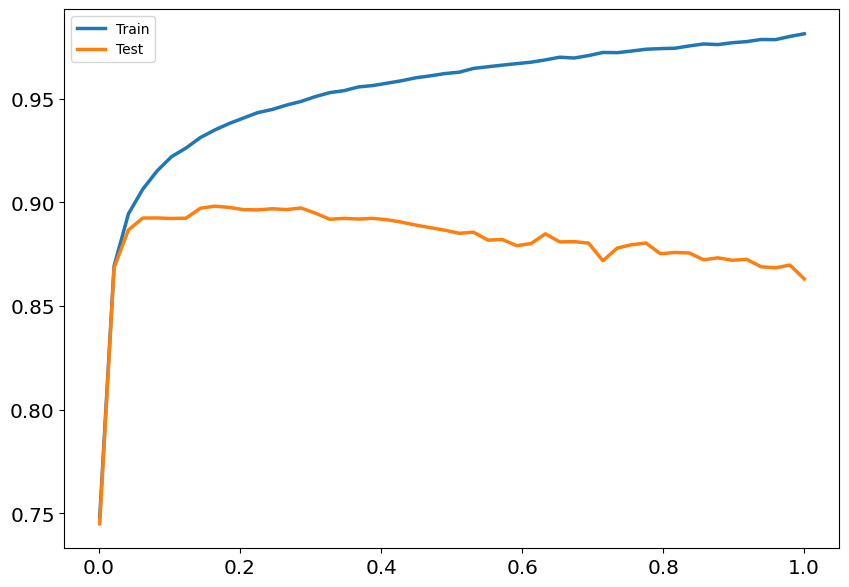

In [ ]:
# Learning curve
# param_values = [int(x) for x in np.linspace(1, 250, 200)] # n_estimators
param_values = [float(x) for x in np.linspace(start = 0.001, stop = 1, num = 50)] # learning_rate

train_scores = []
test_scores = []

for c in param_values:
  model = AdaBoostClassifier(n_estimators=250, learning_rate=c)
  
  model.fit(X_over_ro, y_over_ro)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_over_ro)
  train_auc = roc_auc_score(y_over_ro, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Fitting Result

In [ ]:
abc = AdaBoostClassifier(n_estimators=243, learning_rate=0.62, 
                         algorithm='SAMME.R', random_state=42)
abc.fit(X_over_ro, y_over_ro)
eval_clf_ro(abc)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1318
           1       0.89      0.92      0.90      1318

    accuracy                           0.90      2636
   macro avg       0.90      0.90      0.90      2636
weighted avg       0.90      0.90      0.90      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       565
           1       0.51      0.74      0.60       100

    accuracy                           0.85       665
   macro avg       0.73      0.81      0.76       665
weighted avg       0.88      0.85      0.86       665



{'Test Accuracy': 0.8526315789473684,
 'Test Precision': 0.5068493150684932,
 'Test Recall': 0.74,
 'Test F1': 0.6016260162601627,
 'Train ROC AUC': 0.9677754725626956,
 'Test ROC AUC': 0.8819911504424778,
 'Crossval Train ROC AUC': 0.9597,
 'Crossval Test ROC AUC': 0.8654}

#### Confusion Matrix

In [ ]:
abc_pred = abc.predict(X_test)
abc_pred_train = abc.predict(X_over_ro)

abc_cm = confusion_matrix(y_test, abc_pred)
print(abc_cm)

[[493  72]
 [ 26  74]]


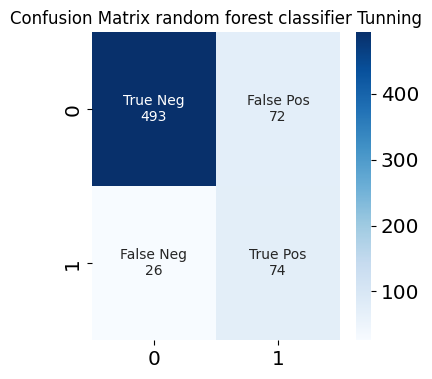

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                abc_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(4,4))
sns.heatmap(abc_cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix random forest classifier Tunning')
# plt.savefig('Confusion Matrix random forest classifier.png')
plt.show()

<i>After doing hyperparameter tuning of the 3 algorithms Random Forest, XGBoost, and AdaBoost, it was found that Random Forest and AdaBoost had good performance. Because the data we have has a lot of categorical data, the model we choose is the **Random Forest**.</i>

## Feature Importance

In [ ]:
def show_feature_importance(model_tuned):
    feat_importances = pd.Series(model_tuned.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Random Forest

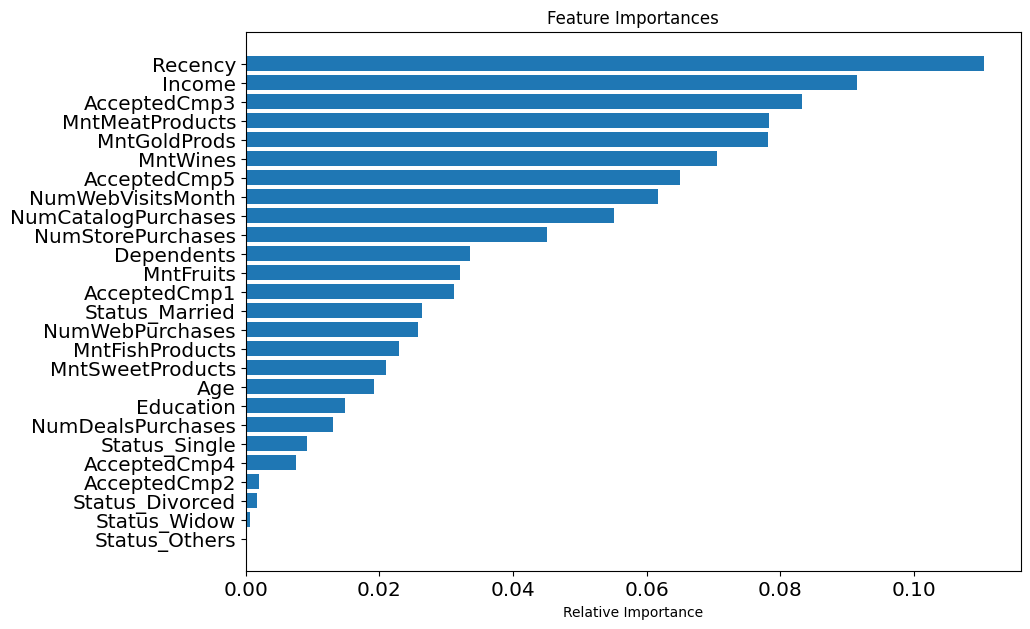

In [ ]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


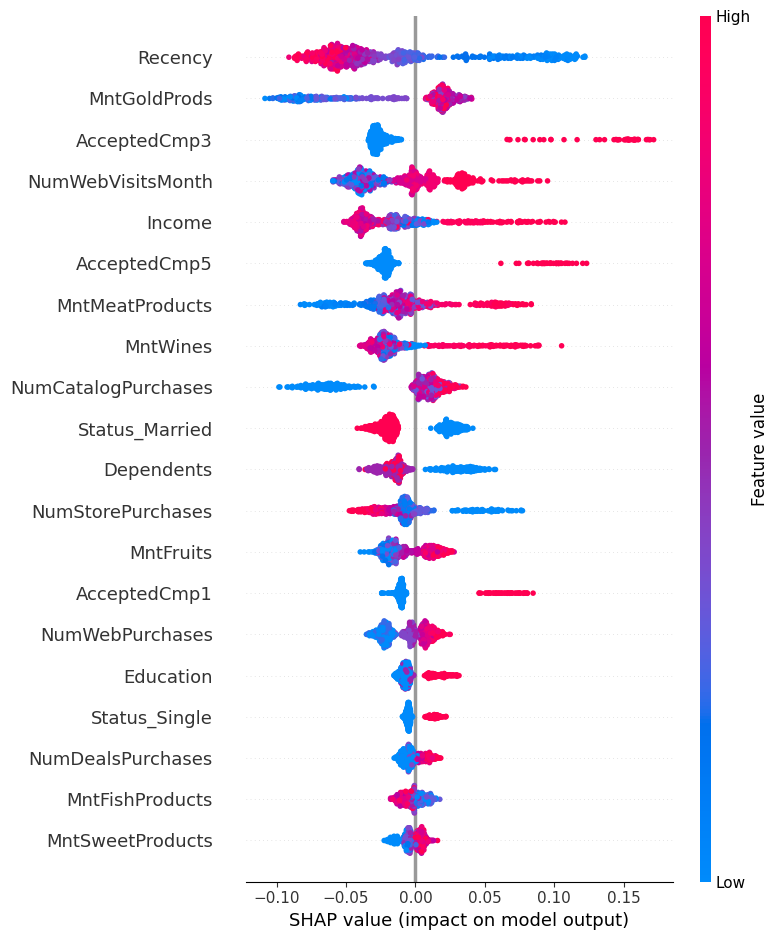

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

Fitur yang paling mempengaruhi customer merespon campaign terakhir adalah:
- Recency rendah: customer yang baru-baru ini melakukan pembelian
- MntGoldProducts tinggi: customer yang membeli produk emas dalam jumlah yang besar
- NumWebVisitsMonth tinggi: customer yang sering mengunjungi website perusahaan, dimana customer dapat melakukan pembelian melalui website perusahaan

Rekomendasi:
- Menargetkan campaign kepada customer yang baru-baru ini melakukan pembelian
- Menargetkan campaign kepada customer yang banyak melakukan pembelian produk emas atau melakukan campaign yang berhubungan dengan produk emas
- Melakukan campaign melalui website perusahaan
